#### EMACS LISP STUFF PLEASE IGNORE
(defun switch-to-notebook ()
 (interactive)
 (st-toggle-to-buffer "*ein: http://127.0.0.1:8899/make_figs.ipynb*"))

In [44]:
%pylab inline
import os,sys
from importlib import reload
from collections import defaultdict
from copy import deepcopy
plt.style.use("default")
plt.rcParams["figure.figsize"] = (8,3)
from matplotlib.gridspec import GridSpec
from scipy.signal import stft
from builtins import sum as bsum

Populating the interactive namespace from numpy and matplotlib


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['yticks', 'xticks']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
# Don't reload this, otherwise it will create a new units registry object
# and will then complain about combining different registries.
import units; UNITS = units.UNITS

In [3]:
flush = lambda *args, **kwargs: [sys.stdout.flush(), print(*args, **kwargs)]

In [8]:
import boulder;   reload(boulder)
import crick;     reload(crick)
import surrogate; reload(surrogate)
import fisher_plumes_tools as fpt;      reload(fpt)
import fisher_plumes_figs  as fpf;      reload(fpf);
import fisher_plumes_fig_tools as fpft; reload(fpft)
import fisher_plumes as fp;             reload(fp)
import utils; reload(utils)
FisherPlumes = fp.FisherPlumes

n_bootstraps = 50
pairs_mode = "unsigned"

crick.logger.setLevel(logging.DEBUG)
force_reload = False

if force_reload or ('Fbw' not in locals()):
    Fbw = FisherPlumes("boulder16", pitch = 25000 * UNITS.um,  freq_max = 20 * UNITS.hertz,
                       which_coords = [(0.45, 0.5),
                                       #(0.35,0.5),
                                       #(0.25,0.5),
                                       #(0.15,0.5)
                                       ]*UNITS.m,
                       py_mode = "relative",
                       suffix  = "manuscript",
                       pairs_mode = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 0)
else:
    Fbw = FisherPlumes(Fbw)
    Fbw.n_bootstraps = n_bootstraps
    
if force_reload or ('Fcr' not in locals()):
    Fcr = FisherPlumes("n12dishT",  pitch = 76000 * UNITS.um, freq_max = 100 * UNITS.hertz,
                       which_coords = [(1.0, 0.5),
                                       #(0.9,0.5),
#                                       (0.7,0.5),
                                       #(0.6,0.5)
                                       ]*UNITS.m,
                       pairs_mode = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 0)
else:
    Fcr = FisherPlumes(Fcr)
    Fcr.n_bootstraps = n_bootstraps

if force_reload or ('Fsu' not in locals()):
    Fsu = FisherPlumes("surr_all_equal",
                       freq_max     = 100 * UNITS.hertz,
                       pitch        = 0.025 * UNITS.m,
                       which_coords = [(1.0, 0.)]*UNITS.m,
                       n_sources    = 16,
                       pairs_mode   = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 1)    
else:
    Fsu = FisherPlumes(Fsu)
    Fsu.n_bootstraps = n_bootstraps

if force_reload or ('Fsu_high_white' not in locals()):
    Fsu_high_white = FisherPlumes("surr_high",
                       freq_max     = 100 * UNITS.hertz,
                       pitch        = 0.025 * UNITS.m,
                       which_coords = [(1.0, 0.)]*UNITS.m,
                       n_sources    = 16,
                       pairs_mode   = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 1, surrogate_k = 0)    
else:
    Fsu_high_white = FisherPlumes(Fsu_high_white)
    Fsu_high_white.n_bootstraps = n_bootstraps    

if force_reload or ('Fsu_high_pink' not in locals()):
    Fsu_high_pink = FisherPlumes("surr_high",
                       freq_max     = 100 * UNITS.hertz,
                       pitch        = 0.025 * UNITS.m,
                       which_coords = [(1.0, 0.)]*UNITS.m,
                       n_sources    = 16,
                       pairs_mode   = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 1, surrogate_k = 4)    
else:
    Fsu_high_pink = FisherPlumes(Fsu_high_pink)
    Fsu_high_pink.n_bootstraps = n_bootstraps    
    
data = {
    "cr":Fcr,
    "bw":Fbw,
    "su":Fsu,
    "su_high_white":Fsu_high_white,
    "su_high_pink":Fsu_high_pink,
}

INFO:boulder:Boulder simulation data available for:


INFO:boulder:Re100_0_5mm_50Hz_16source_manuscript.h5         : ['Odor Data/c1a', 'Odor Data/c1b', 'Odor Data/c2a', 'Odor Data/c2b', 'Odor Data/c3a', 'Odor Data/c3b', 'Odor Data/c4a', 'Odor Data/c4b', 'Odor Data/c5a', 'Odor Data/c5b', 'Odor Data/c6a', 'Odor Data/c6b', 'Odor Data/c7a', 'Odor Data/c7b', 'Odor Data/c8a', 'Odor Data/c8b'] (16 datasets)


INFO:crick:Simulation data available for:


INFO:crick:ff_int_sym_slow_high_tres_wide_n12dishT         : Y0.450 - Y0.550 (11 datasets)


INFO:surrogate:Surrogate simulation data available for: ['no_info', 'one_info', 'two_info', 'high', 'spike_and_slab', 'blue', 'red', 'all_equal']


           fisher_plumes 2023/05/17 04:48:44     INFO: sim_name=<fisher_plumes.FisherPlumes object at 0x7fbcb45f1cd0> is a FisherPlumes object named boulder16.


           fisher_plumes 2023/05/17 04:48:44     INFO: Attempting to copy data fields.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field name.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pitch.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pitch_string.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field sims.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pairs_um.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field n_bootstraps.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field random_seed.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field yvals_um.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pairs_mode.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field wnd.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field freq_max.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field sim0.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field fs.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field dimensions.


           fisher_plumes 2023/05/17 04:48:44     INFO: Copied data fields from FisherPlumes object.


           fisher_plumes 2023/05/17 04:48:44     INFO: sim_name=<fisher_plumes.FisherPlumes object at 0x7fbcb8c04dc0> is a FisherPlumes object named n12dishT.


           fisher_plumes 2023/05/17 04:48:44     INFO: Attempting to copy data fields.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field name.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pitch.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pitch_string.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field sims.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pairs_um.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field n_bootstraps.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field random_seed.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field yvals_um.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pairs_mode.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field wnd.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field freq_max.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field sim0.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field fs.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field dimensions.


           fisher_plumes 2023/05/17 04:48:44     INFO: Copied data fields from FisherPlumes object.


           fisher_plumes 2023/05/17 04:48:44     INFO: sim_name=<fisher_plumes.FisherPlumes object at 0x7fbcb8af0730> is a FisherPlumes object named surr_all_equal.


           fisher_plumes 2023/05/17 04:48:44     INFO: Attempting to copy data fields.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field name.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pitch.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pitch_string.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field sims.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pairs_um.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field n_bootstraps.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field random_seed.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field yvals_um.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pairs_mode.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field wnd.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field freq_max.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field sim0.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field fs.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field dimensions.


           fisher_plumes 2023/05/17 04:48:44     INFO: Copied data fields from FisherPlumes object.


           fisher_plumes 2023/05/17 04:48:44     INFO: sim_name=<fisher_plumes.FisherPlumes object at 0x7fbcb4de1190> is a FisherPlumes object named surr_high.


           fisher_plumes 2023/05/17 04:48:44     INFO: Attempting to copy data fields.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field name.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pitch.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pitch_string.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field sims.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pairs_um.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field n_bootstraps.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field random_seed.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field yvals_um.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pairs_mode.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field wnd.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field freq_max.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field sim0.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field fs.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field dimensions.


           fisher_plumes 2023/05/17 04:48:44     INFO: Copied data fields from FisherPlumes object.


           fisher_plumes 2023/05/17 04:48:44     INFO: sim_name=<fisher_plumes.FisherPlumes object at 0x7fbcb450a040> is a FisherPlumes object named surr_high.


           fisher_plumes 2023/05/17 04:48:44     INFO: Attempting to copy data fields.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field name.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pitch.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pitch_string.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field sims.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pairs_um.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field n_bootstraps.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field random_seed.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field yvals_um.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field pairs_mode.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field wnd.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field freq_max.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field sim0.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field fs.


           fisher_plumes 2023/05/17 04:48:44    DEBUG: Copied field dimensions.


           fisher_plumes 2023/05/17 04:48:44     INFO: Copied data fields from FisherPlumes object.


### Set the desired window size(s) for the analysis

In [9]:
wnd_sec_vals = [1 * UNITS.s]

### Compute the metrics for the specified window sizes

In [51]:
dict_update = lambda d, flds, vals: [d.update({fld:val for fld,val in zip(flds, vals)}),d][1]
dict_update_from_field = lambda d, flds, src: [d.update({fld:d[src] for fld in flds}),d][1]

In [29]:
dmax_um  = {"bw":np.inf, "cr":np.inf}
dmax_um  = dict_update(dmax_um, ["su", "su_high_white", "su_high_pink"], [np.inf]*3)
data_wnd = {}
for wnd_sec in wnd_sec_vals:
    wnd = {k:int(F.fs*wnd_sec) for k, F in data.items()}
    istart = {k:0 if k[0] != "cr" else 1000 for k, F in data.items()} 
    [(print(k, end = ""),
      sys.stdout.flush(),
      F.compute_all_for_window(wnd = wnd[k],
                               istart = istart[k],
                               window = 'boxcar',
                               tukey_param = 0,
                               dmax_um = dmax_um[k],
                               fit_vars = False,
                               weighting_freq_max = (7 if k != "cr" else 70) * UNITS.Hz,
                               )
      ) for k, F in data.items() if k != "bw!"];
    data_wnd[wnd_sec] = deepcopy(data)

cr

           fisher_plumes 2023/05/17 05:01:10     INFO: Window set to self.wnd=1000.


           fisher_plumes 2023/05/17 05:01:10     INFO: Computing trig coefficients for n12dishT with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/17 05:01:10     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/05/17 05:01:11     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/17 05:01:12     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/17 05:01:23     INFO: Computing lambdas.


           fisher_plumes 2023/05/17 05:01:23    DEBUG: sum(freqs<=fmax)=501.


           fisher_plumes 2023/05/17 05:01:25    DEBUG: data.shape=(51, 2, 6556)


           fisher_plumes 2023/05/17 05:01:25    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/05/17 05:02:28    DEBUG: utils.d1(self.la[0]).shape=(51, 501)


           fisher_plumes 2023/05/17 05:02:28     INFO: Computing p-values.


           fisher_plumes 2023/05/17 05:02:28     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/17 05:02:45     INFO: Computing R^2-values.


           fisher_plumes 2023/05/17 05:02:45     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/17 05:02:47     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/17 05:02:47     INFO: Using 24 distances <= inf um 


           fisher_plumes 2023/05/17 05:02:47     INFO: Computed λ for 501 frequencies and 24 distances and 51 bootstraps.


           fisher_plumes 2023/05/17 05:02:47     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/17 05:03:26    DEBUG: self.fit_params[0].shape=(51, 501, 3).


           fisher_plumes 2023/05/17 05:03:26    DEBUG: self.vars_for_freqs[0].shape=(51, 501).


           fisher_plumes 2023/05/17 05:03:26     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/17 05:03:26     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 3000, 4000, 5000, 7000, 8000, 10000, 12000, 15000, 18000, 20000, 22000, 25000, 30000, 40000, 45000, 48000, 50000, 52000, 55000, 60000, 70000, 100000].


           fisher_plumes 2023/05/17 05:03:27    DEBUG: self.I[0].shape=(51, 501, 27) has the expected value.


           fisher_plumes 2023/05/17 05:03:27     INFO: Done computing all for wnd=1000.


bw

           fisher_plumes 2023/05/17 05:03:27     INFO: Window set to self.wnd=50.


           fisher_plumes 2023/05/17 05:03:27     INFO: Computing trig coefficients for boulder16 with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/17 05:03:27     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/05/17 05:03:27     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/17 05:03:27     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/17 05:03:27     INFO: Computing lambdas.


           fisher_plumes 2023/05/17 05:03:27    DEBUG: sum(freqs<=fmax)=26.


           fisher_plumes 2023/05/17 05:03:27    DEBUG: data.shape=(51, 2, 3808)


           fisher_plumes 2023/05/17 05:03:27    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/05/17 05:03:30    DEBUG: utils.d1(self.la[0]).shape=(51, 26)


           fisher_plumes 2023/05/17 05:03:30     INFO: Computing p-values.


           fisher_plumes 2023/05/17 05:03:30     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/17 05:03:31     INFO: Computing R^2-values.


           fisher_plumes 2023/05/17 05:03:31     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/17 05:03:31     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/17 05:03:31     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/17 05:03:31     INFO: Computed λ for 26 frequencies and 16 distances and 51 bootstraps.


           fisher_plumes 2023/05/17 05:03:31     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/17 05:03:35    DEBUG: self.fit_params[0].shape=(51, 26, 3).


           fisher_plumes 2023/05/17 05:03:35    DEBUG: self.vars_for_freqs[0].shape=(51, 26).


           fisher_plumes 2023/05/17 05:03:35     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/17 05:03:35     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/17 05:03:35    DEBUG: self.I[0].shape=(51, 26, 21) has the expected value.


           fisher_plumes 2023/05/17 05:03:35     INFO: Done computing all for wnd=50.


su

           fisher_plumes 2023/05/17 05:03:35     INFO: Window set to self.wnd=50.


           fisher_plumes 2023/05/17 05:03:35     INFO: Computing trig coefficients for surr_all_equal with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/17 05:03:35     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/05/17 05:03:35     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/17 05:03:35     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/17 05:03:35     INFO: Computing lambdas.


           fisher_plumes 2023/05/17 05:03:35    DEBUG: sum(freqs<=fmax)=26.


           fisher_plumes 2023/05/17 05:03:35    DEBUG: data.shape=(51, 2, 3808)


           fisher_plumes 2023/05/17 05:03:35    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/05/17 05:03:38    DEBUG: utils.d1(self.la[0]).shape=(51, 26)


           fisher_plumes 2023/05/17 05:03:38     INFO: Computing p-values.


           fisher_plumes 2023/05/17 05:03:38     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/17 05:03:39     INFO: Computing R^2-values.


           fisher_plumes 2023/05/17 05:03:39     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/17 05:03:39     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/17 05:03:39     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/17 05:03:39     INFO: Computed λ for 26 frequencies and 16 distances and 51 bootstraps.


           fisher_plumes 2023/05/17 05:03:39     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/17 05:03:43    DEBUG: self.fit_params[0].shape=(51, 26, 3).


           fisher_plumes 2023/05/17 05:03:43    DEBUG: self.vars_for_freqs[0].shape=(51, 26).


           fisher_plumes 2023/05/17 05:03:43     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/17 05:03:43     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/17 05:03:43    DEBUG: self.I[0].shape=(51, 26, 21) has the expected value.


           fisher_plumes 2023/05/17 05:03:43     INFO: Done computing all for wnd=50.


su_high_white

           fisher_plumes 2023/05/17 05:03:43     INFO: Window set to self.wnd=50.


           fisher_plumes 2023/05/17 05:03:43     INFO: Computing trig coefficients for surr_high with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/17 05:03:43     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/05/17 05:03:43     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/17 05:03:43     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/17 05:03:43     INFO: Computing lambdas.


           fisher_plumes 2023/05/17 05:03:43    DEBUG: sum(freqs<=fmax)=26.


           fisher_plumes 2023/05/17 05:03:43    DEBUG: data.shape=(51, 2, 3808)


           fisher_plumes 2023/05/17 05:03:43    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/05/17 05:03:45    DEBUG: utils.d1(self.la[0]).shape=(51, 26)


           fisher_plumes 2023/05/17 05:03:45     INFO: Computing p-values.


           fisher_plumes 2023/05/17 05:03:45     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/17 05:03:46     INFO: Computing R^2-values.


           fisher_plumes 2023/05/17 05:03:46     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/17 05:03:46     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/17 05:03:46     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/17 05:03:46     INFO: Computed λ for 26 frequencies and 16 distances and 51 bootstraps.


           fisher_plumes 2023/05/17 05:03:46     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/17 05:03:50    DEBUG: self.fit_params[0].shape=(51, 26, 3).


           fisher_plumes 2023/05/17 05:03:50    DEBUG: self.vars_for_freqs[0].shape=(51, 26).


           fisher_plumes 2023/05/17 05:03:50     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/17 05:03:50     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/17 05:03:50    DEBUG: self.I[0].shape=(51, 26, 21) has the expected value.


           fisher_plumes 2023/05/17 05:03:50     INFO: Done computing all for wnd=50.


su_high_pink

           fisher_plumes 2023/05/17 05:03:50     INFO: Window set to self.wnd=50.


           fisher_plumes 2023/05/17 05:03:50     INFO: Computing trig coefficients for surr_high with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/17 05:03:50     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/05/17 05:03:50     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/17 05:03:50     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/17 05:03:51     INFO: Computing lambdas.


           fisher_plumes 2023/05/17 05:03:51    DEBUG: sum(freqs<=fmax)=26.


           fisher_plumes 2023/05/17 05:03:51    DEBUG: data.shape=(51, 2, 3808)


           fisher_plumes 2023/05/17 05:03:51    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/05/17 05:03:53    DEBUG: utils.d1(self.la[0]).shape=(51, 26)


           fisher_plumes 2023/05/17 05:03:53     INFO: Computing p-values.


           fisher_plumes 2023/05/17 05:03:53     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/17 05:03:54     INFO: Computing R^2-values.


           fisher_plumes 2023/05/17 05:03:54     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/17 05:03:54     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/17 05:03:54     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/17 05:03:54     INFO: Computed λ for 26 frequencies and 16 distances and 51 bootstraps.


           fisher_plumes 2023/05/17 05:03:54     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/17 05:03:58    DEBUG: self.fit_params[0].shape=(51, 26, 3).


           fisher_plumes 2023/05/17 05:03:58    DEBUG: self.vars_for_freqs[0].shape=(51, 26).


           fisher_plumes 2023/05/17 05:03:58     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/17 05:03:58     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/17 05:03:58    DEBUG: self.I[0].shape=(51, 26, 21) has the expected value.


           fisher_plumes 2023/05/17 05:03:58     INFO: Done computing all for wnd=50.


### Set the time window of data that we want to plot

In [31]:
wnd_sec = wnd_sec_vals[0]
data = data_wnd[wnd_sec]
print(f"{wnd_sec=}")

wnd_sec=<Quantity(1, 'second')>


### Whether to save the plots we make and where to put them

In [32]:
SAVEPLOTS = True # Whether to actually make the plots
fig_dir_fun = lambda wnd_sec: f"figs/wnd_{wnd_sec.magnitude:g}sec"
fig_dir = fig_dir_fun(wnd_sec)
if not os.path.exists(fig_dir):
    print(f"Creating {fig_dir=}")
    os.mkdir(fig_dir)
else:
    print(f"{fig_dir=} already exists.")

fig_dir='figs/wnd_1sec' already exists.


In [35]:
su_ds = [k for k in data if k.startswith("su")]
print(f"Surrogate datasets = {su_ds}.")

Surrogate datasets = ['su', 'su_high_white', 'su_high_pink'].


# Figure showing an example plume and correlations

In [45]:
DEFAULT   = "default"
isdefault = lambda x: type(x) is str and x == DEFAULT

which_srcs   = dict_update_from_field({"bw":[-3750, 3750],        "cr":[490000,510000]},       su_ds, "bw")        
t_wnd        = dict_update_from_field({"bw":[-4,4]*UNITS.sec,     "cr":[-0.5, 0.5]*UNITS.sec}, su_ds, "bw")
which_idists = dict_update_from_field({"bw":[0,2,3],              "cr":[0,10,20]},             su_ds, "bw")
tticks       = dict_update_from_field({"bw":DEFAULT,              "cr":[39.5,40,40.5]},        su_ds, "bw")
xticks       = dict_update_from_field({"bw":DEFAULT,              "cr":DEFAULT},               su_ds, "bw")
yticks       = dict_update_from_field({"bw":DEFAULT,              "cr":DEFAULT},               su_ds, "bw")

INFO:boulder:Loading fld='c1a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c1a_t40.p'.


INFO:boulder:Loading fld='c1b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c1b_t40.p'.


INFO:boulder:Loading fld='c2a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c2a_t40.p'.


INFO:boulder:Loading fld='c2b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c2b_t40.p'.


INFO:boulder:Loading fld='c3a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c3a_t40.p'.


INFO:boulder:Loading fld='c3b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c3b_t40.p'.


INFO:boulder:Loading fld='c4a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c4a_t40.p'.


INFO:boulder:Loading fld='c4b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c4b_t40.p'.


INFO:boulder:Loading fld='c5a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c5a_t40.p'.


INFO:boulder:Loading fld='c5b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c5b_t40.p'.


INFO:boulder:Loading fld='c6a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c6a_t40.p'.


INFO:boulder:Loading fld='c6b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c6b_t40.p'.


INFO:boulder:Loading fld='c7a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c7a_t40.p'.


INFO:boulder:Loading fld='c7b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c7b_t40.p'.


INFO:boulder:Loading fld='c8a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c8a_t40.p'.


INFO:boulder:Loading fld='c8b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c8b_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y550_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y498_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y502_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y510_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y500_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y495_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y505_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y480_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y450_S1_t40.p'.


Wrote figs/wnd_1sec/plumes_demo_bw.pdf.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y490_S1_t40.p'.


INFO:crick:Loading fld='S1' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/crick/saved-snapshots/y520_S1_t40.p'.


Wrote figs/wnd_1sec/plumes_demo_cr.pdf.


Wrote figs/wnd_1sec/plumes_demo_su.pdf.


Wrote figs/wnd_1sec/plumes_demo_su_high_pink.pdf.


Wrote figs/wnd_1sec/plumes_demo_su_high_white.pdf.


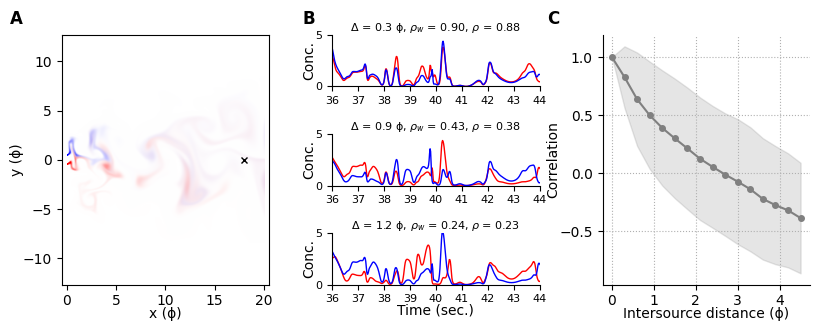

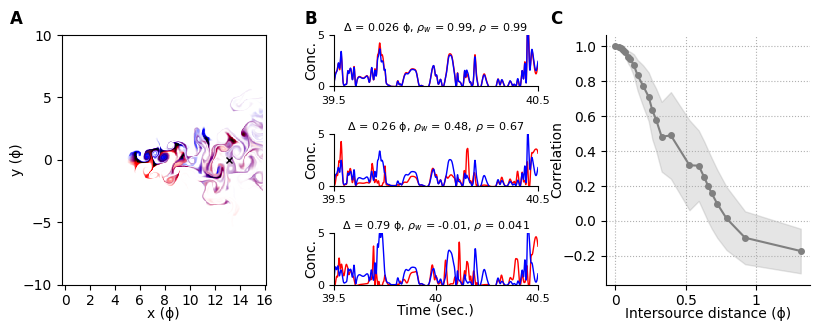

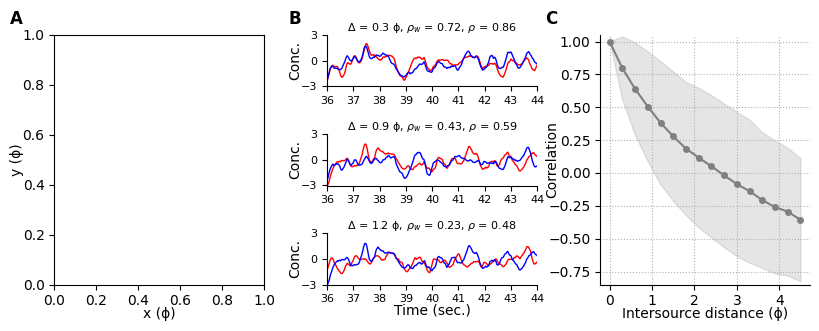

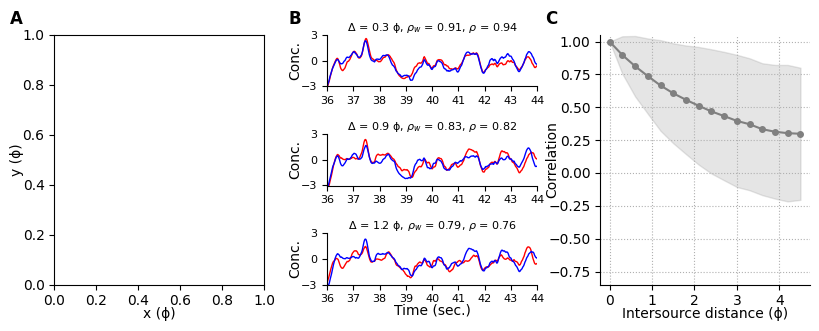

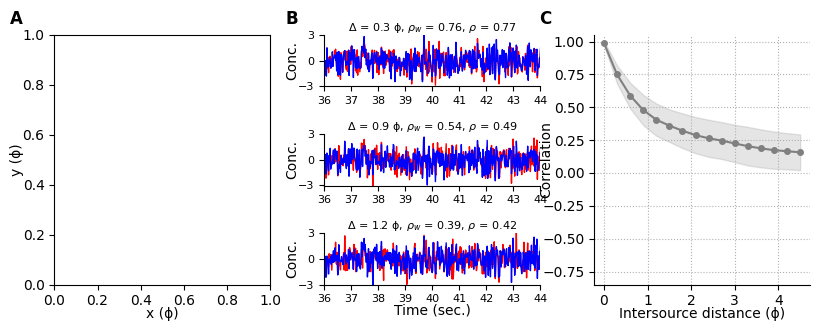

In [46]:
reload(fpf)
reload(fpft)

for k, F in sorted(data.items()):
    data_dir = os.path.join(os.environ["FISHER_PLUMES_DATA"], defaultdict(str, {"bw":"boulder", "cr":"crick"})[k], "saved-snapshots")
    ax_plume, ax_traces, ax_corr = fpf.plot_plumes_demo(F, 40 * UNITS.sec, which_srcs[k], y_lim = (0,5.01) if k[:2]!="su" else (-3.01,3.01), y_ticks = [-3,0,3] if k[:2]=="su" else None,
                                                        t_wnd = t_wnd[k], dt = 1 * UNITS.sec, which_idists=which_idists[k], data_dir=data_dir)
    not isdefault(tticks[k]) and ax_traces[-1].set_xticks(tticks[k])    
    not isdefault(xticks[k]) and ax_plume.set_xticks(xticks[k])
    not isdefault(yticks[k]) and ax_plume.set_yticks(yticks[k])
    if k in ["su_high", "su", "bw"]: ax_corr.set_xticks(arange(5))
    if k.startswith("su"): [ax_corr.set_ylim(-0.85,1.05), ax_corr.set_ylabel("Correlation",labelpad=-8)]
    fpft.label_axes([ax_plume, ax_traces[0], ax_corr], "ABC", y = [0.99]*3, fontsize=12, fontweight="bold")
    file_name = f"{fig_dir}/plumes_demo_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));    

# Set the probe index we'll use

In [48]:
iprb = 0

# Figure showing the distribution of correlations

cr
Mapped frequencies [ 1  3  7 10] Hz to indices [1, 3, 7, 10].


Wrote figs/wnd_1sec/corr_components_cr.pdf.
bw
Mapped frequencies [ 1  3  7 10] Hz to indices [1, 3, 7, 10].


Wrote figs/wnd_1sec/corr_components_bw.pdf.
su
Mapped frequencies [ 1  3  7 10] Hz to indices [1, 3, 7, 10].


Wrote figs/wnd_1sec/corr_components_su.pdf.
su_high_white
Mapped frequencies [ 1  3 17 20] Hz to indices [1, 3, 17, 20].


Wrote figs/wnd_1sec/corr_components_su_high_white.pdf.
su_high_pink
Mapped frequencies [ 1  3 17 20] Hz to indices [1, 3, 17, 20].


Wrote figs/wnd_1sec/corr_components_su_high_pink.pdf.


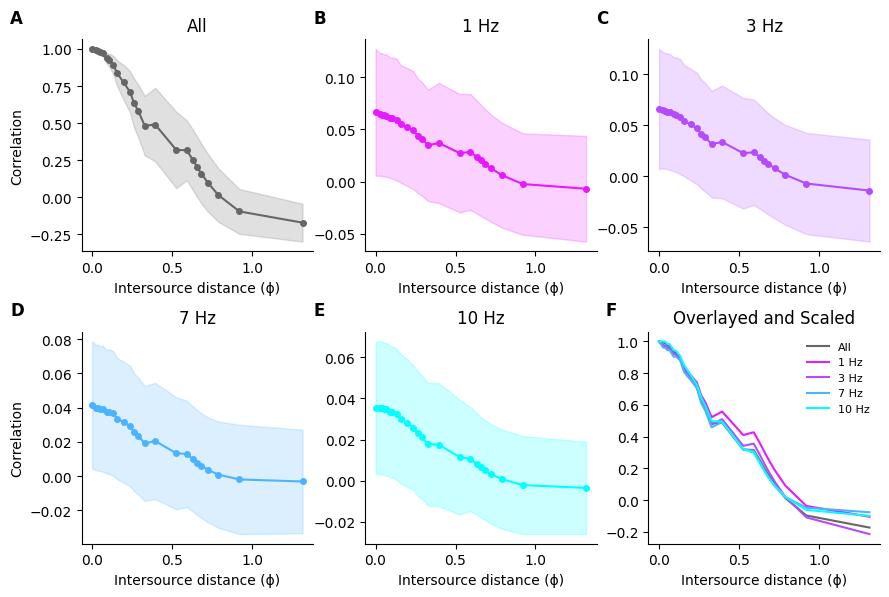

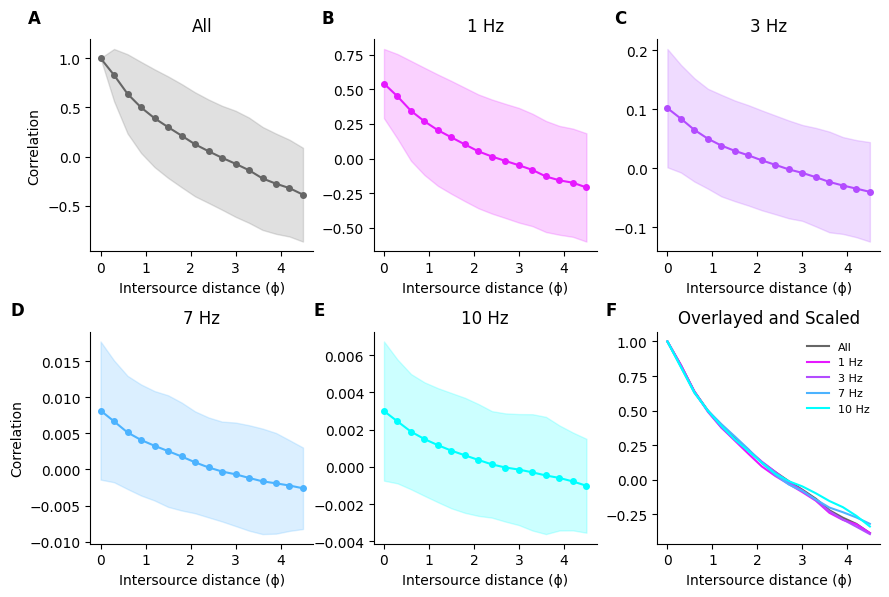

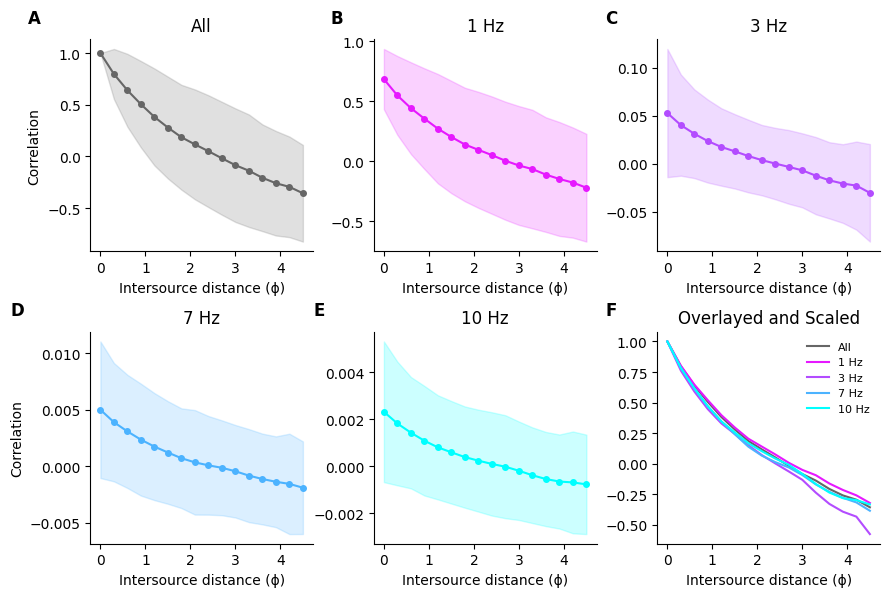

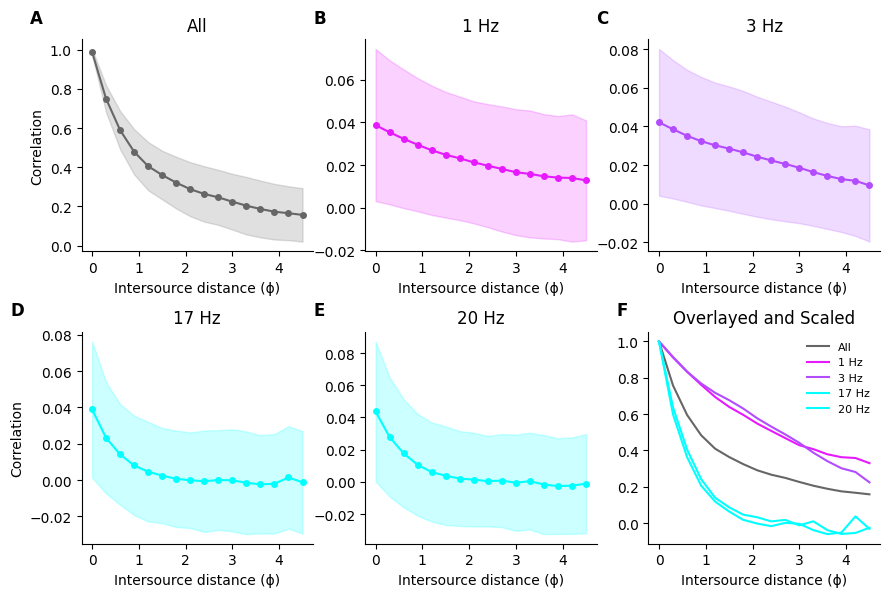

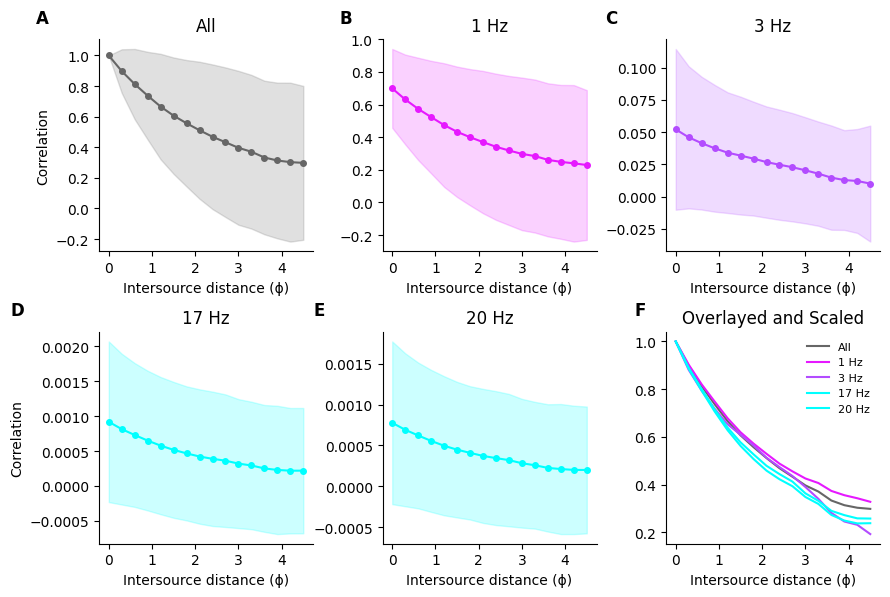

In [50]:
reload(fpf)
xlims_  = defaultdict(lambda: DEFAULT) #{"su_high":DEFAULT, "su":DEFAULT, "bw":DEFAULT, "cr":DEFAULT}
xticks_ = defaultdict(lambda: DEFAULT) #{"su_high":DEFAULT, "su":DEFAULT, "bw":DEFAULT, "cr":DEFAULT}
for k, F in data.items():
    which_freqs = ([1,3,17,20] if k.startswith("su_high") else [1,3,7,10]) * UNITS.Hz
    labs = [f"{f}" for f in which_freqs]
    cols = {"All":cm.gray(0.4)}; cols.update({l:col for l,col in zip(labs, [cm.cool(1 - f.magnitude/10) for f in which_freqs])})    
    print(k)
    slices = {"All":slice(1,10000)}
    freq_inds = F.freqs2inds(which_freqs)
    print(f"Mapped frequencies {which_freqs} to indices {freq_inds}.")
    slices.update({l:slice(fi, fi+1) for l, fi in zip(labs, freq_inds)})
    ax = fpf.plot_correlations(F.rho[iprb], F.pitch.to("um").magnitude, slices=slices, cols=cols, n_rows = 2, plot_order = ["All"] + labs)
    [(axi.set_xlabel(f"Intersource distance ({fpf.pitch_sym})"),
      not isdefault(xlims_[k])  and axi.set_xlim(xlims_[k]),
      not isdefault(xticks_[k]) and axi.set_xticks(xticks_[k])) for axi in ax]    
    file_name = f"{fig_dir}/corr_components_{k}.pdf"
    fpft.label_axes(ax, "ABCDEF", fontsize=12, fontweight="bold", dy=-0.01)        
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."))

# The Multivariate Gaussian Fits

bw
Mapped 5 Hz to index 5.


Wrote figs/wnd_1sec/coef_vs_coef_bw_5Hz.pdf.
cr
Mapped 5 Hz to index 5.


Wrote figs/wnd_1sec/coef_vs_coef_cr_5Hz.pdf.
su
Mapped 5 Hz to index 5.


Wrote figs/wnd_1sec/coef_vs_coef_su_5Hz.pdf.
su_high_pink
Mapped 5 Hz to index 5.


Wrote figs/wnd_1sec/coef_vs_coef_su_high_pink_5Hz.pdf.
su_high_white
Mapped 5 Hz to index 5.


Wrote figs/wnd_1sec/coef_vs_coef_su_high_white_5Hz.pdf.


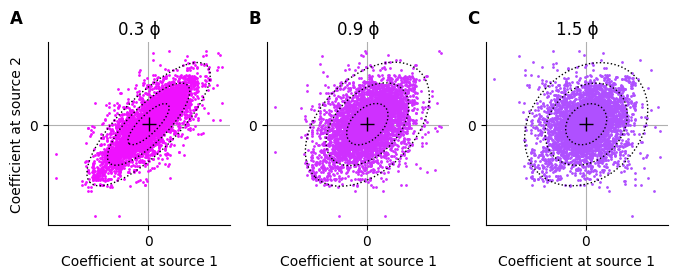

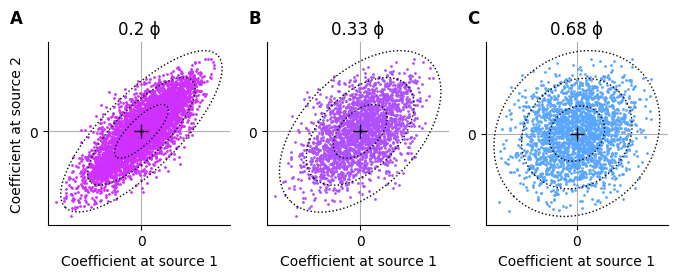

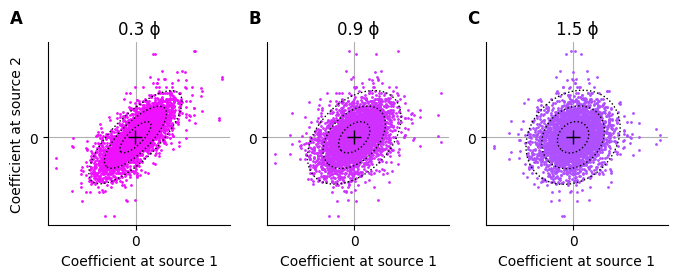

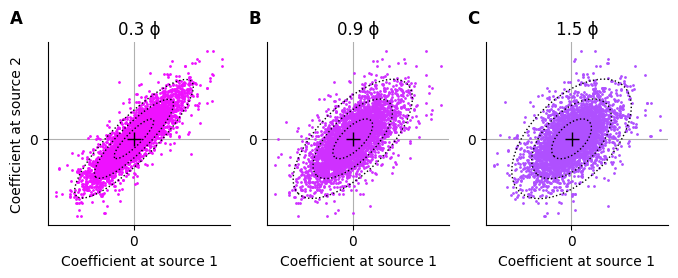

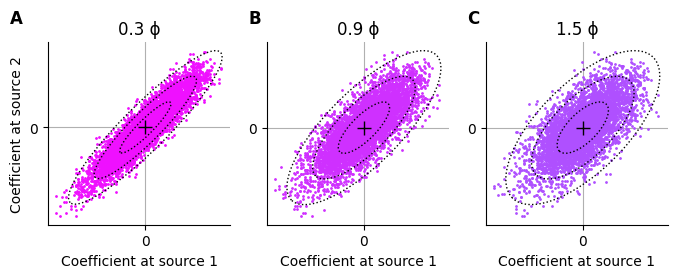

In [52]:
reload(fpf)
which_freqs = dict_update_from_field({"bw":5 * UNITS.hertz, "cr":5 * UNITS.hertz}, su_ds, "bw")
which_idists= dict_update_from_field({"bw":[0,2,4],         "cr":[8,12,18]},       su_ds, "bw")
dcol_scales = dict_update_from_field({"bw":120000,          "cr":80000},           su_ds, "bw")
for name, F in sorted(data.items()):
    print(name)
    which_freq = which_freqs[name]
    ifreq = F.freqs2inds([which_freq])[0]
    print(f"Mapped {which_freq} to index {ifreq}.")
    ax = fpf.plot_coef1_vs_coef2([F.ss[iprb], F.cc[iprb]],
                                 ifreq,
                                 F.pairs_um,
                                 F.pitch_string,                                 
                            i_pos_dists_to_plot = which_idists[name],
                            dist_col_scale = dcol_scales[name]
    )
    fpft.label_axes(ax, "ABC", fontsize=12, fontweight="bold", dy=-0.01)            
    file_name = f"{fig_dir}/coef_vs_coef_{name}_{which_freq.magnitude}Hz.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));

# Supplementary Information

Wrote figs/wnd_1sec/coefs_and_traces_bw_5Hz.pdf.


Wrote figs/wnd_1sec/coefs_and_traces_cr_5Hz.pdf.


Wrote figs/wnd_1sec/coefs_and_traces_su_5Hz.pdf.


Wrote figs/wnd_1sec/coefs_and_traces_su_high_pink_5Hz.pdf.


Wrote figs/wnd_1sec/coefs_and_traces_su_high_white_5Hz.pdf.


<Figure size 800x300 with 0 Axes>

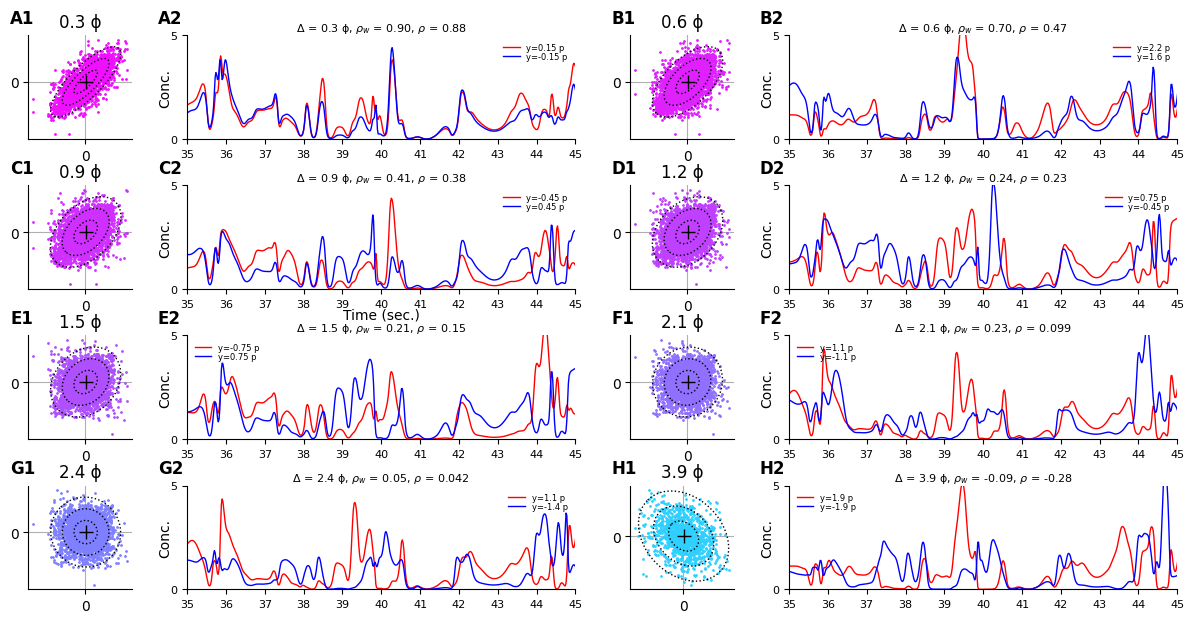

<Figure size 800x300 with 0 Axes>

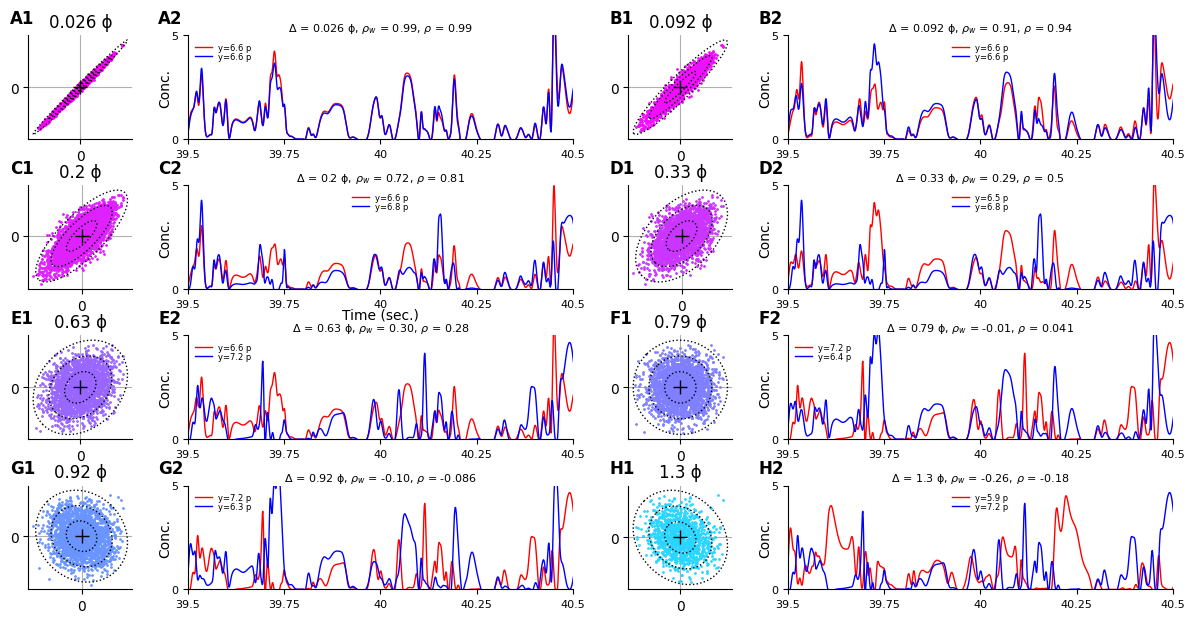

<Figure size 800x300 with 0 Axes>

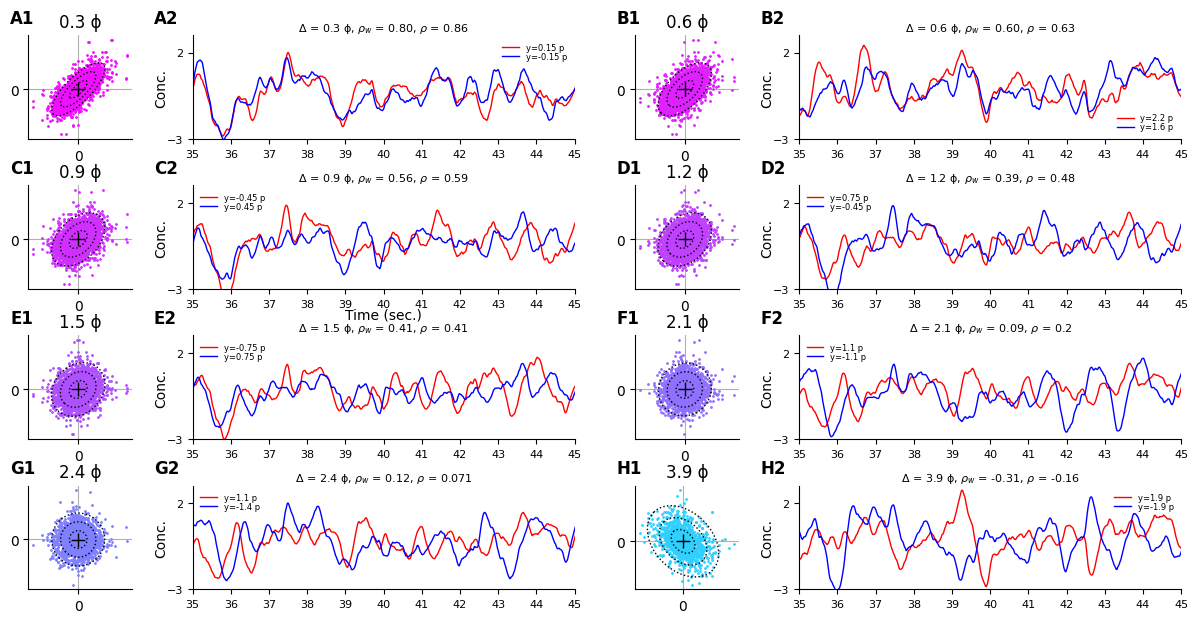

<Figure size 800x300 with 0 Axes>

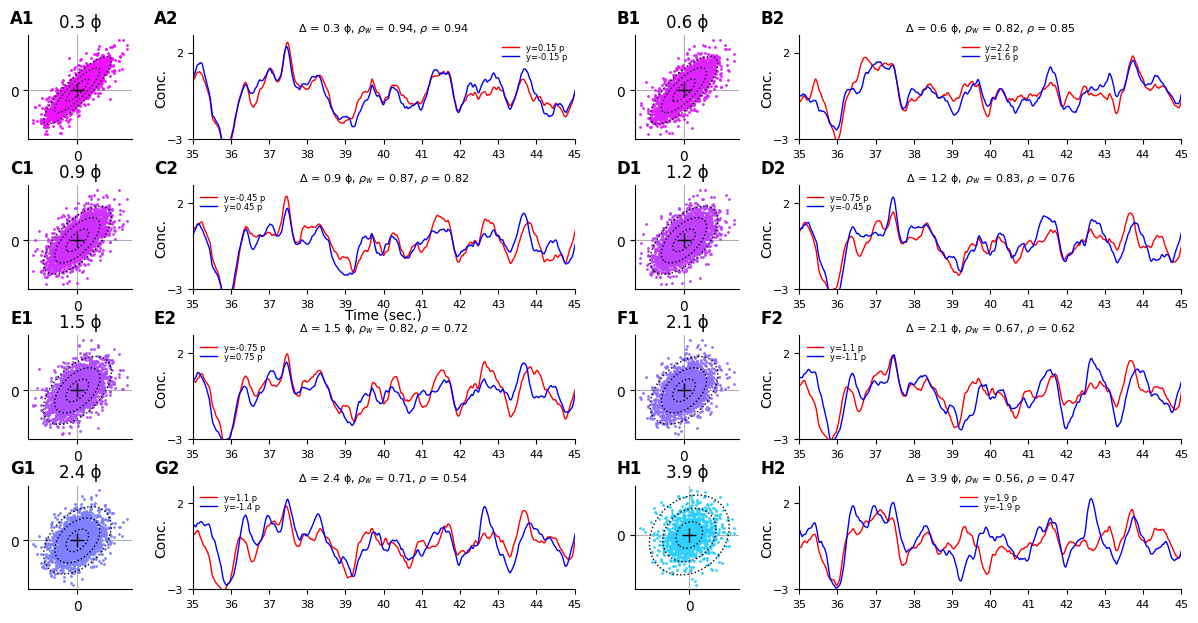

<Figure size 800x300 with 0 Axes>

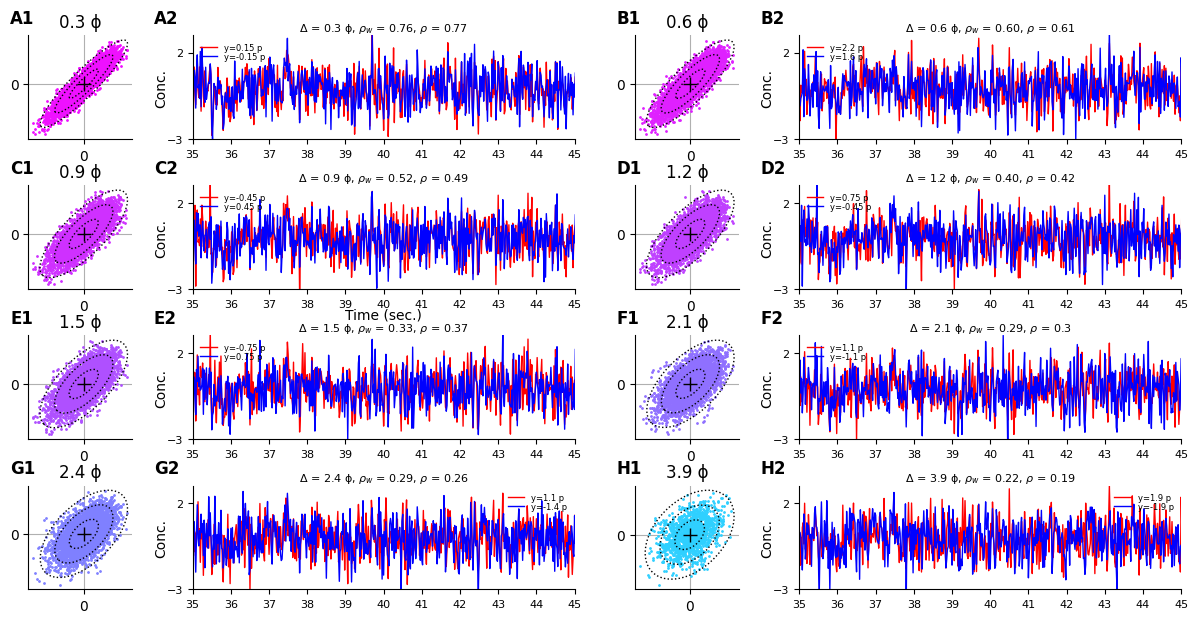

In [54]:
reload(fpf)
reload(fpft)
freq      = dict_update_from_field({"bw":5 * UNITS.hertz,          "cr":5 * UNITS.hertz},        su_ds, "bw")
idists    = dict_update_from_field({"bw":[0,1,2,3,4,6,7,12],       "cr":[0,4,8,12,16,20,21,22]}, su_ds, "bw")
t_lim     = dict_update_from_field({"bw":[35, 45]*UNITS.sec,       "cr":[39.5,40.5]*UNITS.sec},  su_ds, "bw")
dt        = dict_update_from_field({"bw":1*UNITS.sec,              "cr":0.25*UNITS.sec},         su_ds, "bw")
for k, F in sorted(data.items()):
    figure(figsize=(12,6))
    coef_ax, trace_ax = fpf.plot_coef_vs_coef_and_traces(F, freq[k], idists[k],
                                                         which_probe = iprb, n_per_row = 2,
                                                         y_lim=[0,5] if k[:2]!="su" else [-3,3],
                                                         t_lim = t_lim[k],
                                                         dt = dt[k])
    for ax in coef_ax:
        ax.set_xlabel("")
        ax.set_ylabel("")
    [ax.legend(fontsize=6,labelspacing=0,frameon=False) for ax in trace_ax]
    tight_layout(pad=0)
    all_ax = bsum([[ax_c, ax_t] for ax_c, ax_t in zip(coef_ax, trace_ax)], [])
    n_ax   = len(all_ax)
    fpft.label_axes(all_ax,
                    [ch+nu for ch in "ABCDEFGH" for nu in "12"],
                    align_x = [list(range(i,n_ax,4)) for i in range(4)],
                    align_y = [list(range(i,i+4)) for i in range(0,n_ax,4)],
                    fontsize=12, fontweight="bold", dy=-0.01)
    file_name = f"{fig_dir}/coefs_and_traces_{k}_{freq[k].to(UNITS.hertz).magnitude}Hz.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));

# Asymmetric Laplacian Fits

d=2000 @ Freq #   1: -np.log10(p) = 1.840
[0.20755665 0.0870585  0.06159792 ... 0.12384826 0.0338169  0.00923384]
d=25000 @ Freq #   1: -np.log10(p) = 0.500
[ 0.12255386 -0.03090319  0.03312339 ...  0.10534059  0.03336514
 -0.02937252]
d=52000 @ Freq #   1: -np.log10(p) = 0.408
[ 0.17079124 -0.00410376 -0.0654824  ... -0.03641101 -0.04617336
 -0.00117167]
Setting extent to [-0.5, 23.5, 0.5, 100.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_cr_1Hz.pdf.
d=2000 @ Freq #   5: -np.log10(p) = 2.319
[0.12919974 0.21820692 0.01949942 ... 0.03631866 0.00510159 0.03259399]
d=25000 @ Freq #   5: -np.log10(p) = 1.635
[ 0.06159125  0.11170298 -0.02439674 ...  0.02775059  0.00329278
  0.03281143]
d=52000 @ Freq #   5: -np.log10(p) = 0.858
[-0.06229666 -0.03952332  0.0040602  ... -0.01264717  0.00901676
  0.04089836]
Setting extent to [-0.5, 23.5, 0.5, 100.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_cr_5Hz.pdf.
d=2000 @ Freq #  10: -np.log10(p) = 2.340
[0.00503285 0.02018888 0.04987108 ... 0.01107533 0.00424536 0.03464098]
d=25000 @ Freq #  10: -np.log10(p) = 1.594
[ 0.00217159  0.01541451  0.04515412 ... -0.00882384 -0.00264313
  0.02690133]
d=52000 @ Freq #  10: -np.log10(p) = 0.401
[ 0.01332228  0.01027873  0.00221804 ... -0.0064883   0.00608274
 -0.02506879]
Setting extent to [-0.5, 23.5, 0.5, 100.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_cr_10Hz.pdf.
d=7500 @ Freq #   1: -np.log10(p) = 186.028
[0.73388985 0.51996969 0.86476028 ... 0.76979393 0.53486929 0.85914464]
d=15000 @ Freq #   1: -np.log10(p) = 119.311
[ 0.41043656 -0.69356516 -0.75728178 ... -0.11119759  0.68824137
  0.70938795]
d=22500 @ Freq #   1: -np.log10(p) = 86.606
[ 0.52465104 -0.64267089 -0.72976078 ... -0.03530174  0.36959607
  0.30982411]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_su_1Hz.pdf.
d=7500 @ Freq #   5: -np.log10(p) = 16.345
[0.0091029  0.00678568 0.00960195 ... 0.0087308  0.00015387 0.00015828]
d=15000 @ Freq #   5: -np.log10(p) = 10.876
[-0.0002165  -0.004996    0.00057478 ...  0.00910371  0.00123307
  0.00080148]
d=22500 @ Freq #   5: -np.log10(p) = 4.149
[-1.72389146e-03 -3.84122735e-03  6.44805069e-03 ...  8.94878419e-03
  5.86628035e-05  6.58186615e-03]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_su_5Hz.pdf.
d=7500 @ Freq #  10: -np.log10(p) = 22.775
[0.00136297 0.00351137 0.0028401  ... 0.00155282 0.00165557 0.00078295]
d=15000 @ Freq #  10: -np.log10(p) = 12.345
[ 0.00010447 -0.00201933  0.0009858  ...  0.00202633  0.00139685
  0.00038532]
d=22500 @ Freq #  10: -np.log10(p) = 8.178
[-0.00016401 -0.0017123   0.00210008 ...  0.00457412 -0.00022518
  0.00123328]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_su_10Hz.pdf.
d=7500 @ Freq #   1: -np.log10(p) = 249.779
[0.76114325 0.26391665 0.75521993 ... 0.78475242 0.53879624 0.85722164]
d=15000 @ Freq #   1: -np.log10(p) = 212.587
[ 0.44314775 -0.52736213 -0.54172248 ...  0.25924434  0.67024484
  0.78371201]
d=22500 @ Freq #   1: -np.log10(p) = 167.955
[ 0.52590221 -0.49317755 -0.48692181 ...  0.40792909  0.75432541
  0.80044176]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_su_high_pink_1Hz.pdf.
d=7500 @ Freq #   5: -np.log10(p) = 15.863
[0.00831057 0.0071875  0.01007569 ... 0.00849963 0.00017079 0.00012878]
d=15000 @ Freq #   5: -np.log10(p) = 11.674
[ 0.00017955 -0.00139071 -0.00093342 ...  0.01113063  0.00087492
  0.00051399]
d=22500 @ Freq #   5: -np.log10(p) = 10.048
[-0.00072416 -0.00061461  0.0028347  ...  0.01587716  0.00504016
  0.00528596]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_su_high_pink_5Hz.pdf.
d=7500 @ Freq #  10: -np.log10(p) = 28.059
[0.00107039 0.00648442 0.00384829 ... 0.00147313 0.00155484 0.0007246 ]
d=15000 @ Freq #  10: -np.log10(p) = 18.963
[-6.32932490e-05 -2.20281589e-03  8.13937774e-04 ...  2.27782638e-03
  1.41432304e-03  5.04658566e-04]
d=22500 @ Freq #  10: -np.log10(p) = 16.026
[-0.00037026 -0.00166827  0.0016526  ...  0.00538394  0.00208798
  0.00156455]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_su_high_pink_10Hz.pdf.
d=7500 @ Freq #   1: -np.log10(p) = 2.519
[ 0.02295597 -0.00019045  0.08205085 ...  0.09162192  0.01768265
  0.03678076]
d=15000 @ Freq #   1: -np.log10(p) = 4.141
[ 0.0280275  -0.00945674 -0.01106184 ...  0.05884533  0.02615483
  0.0352756 ]
d=22500 @ Freq #   1: -np.log10(p) = 4.111
[ 0.02773823 -0.00641014 -0.00544311 ...  0.02805933  0.09384825
  0.1157981 ]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_su_high_white_1Hz.pdf.
d=7500 @ Freq #   5: -np.log10(p) = 2.051
[ 0.04902386  0.04167906 -0.00579472 ...  0.02296296  0.0203833
  0.02244509]
d=15000 @ Freq #   5: -np.log10(p) = 2.182
[0.04446598 0.04593648 0.00936448 ... 0.01748916 0.00775104 0.01730985]
d=22500 @ Freq #   5: -np.log10(p) = 3.118
[0.04172262 0.03566188 0.00344249 ... 0.04500145 0.00508519 0.00676729]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_su_high_white_5Hz.pdf.
d=7500 @ Freq #  10: -np.log10(p) = 1.913
[ 0.0375427   0.02150126  0.11772681 ...  0.02795427  0.02491991
 -0.00174584]
d=15000 @ Freq #  10: -np.log10(p) = 2.078
[ 0.04759286  0.01260464  0.01884541 ...  0.03269833  0.03350806
 -0.00492643]
d=22500 @ Freq #  10: -np.log10(p) = 1.792
[0.02646827 0.01037782 0.013177   ... 0.0523775  0.00856881 0.07198358]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/alap_fits_su_high_white_10Hz.pdf.


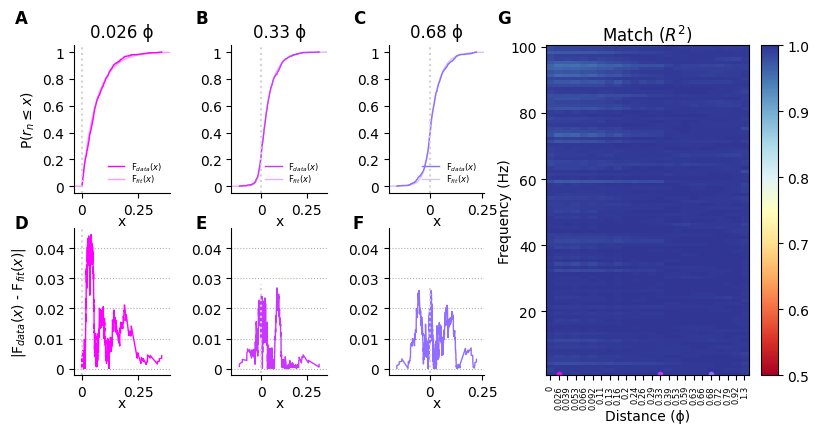

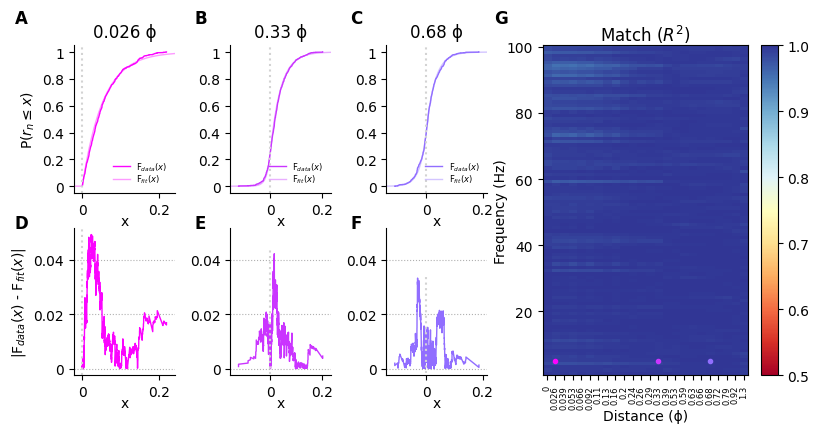

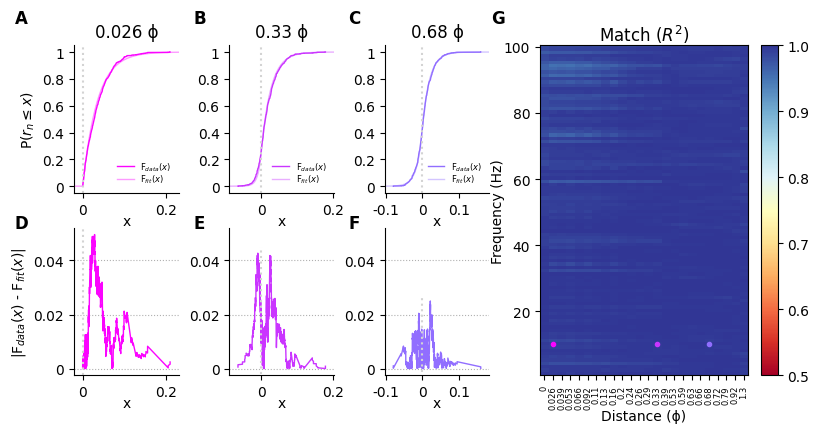

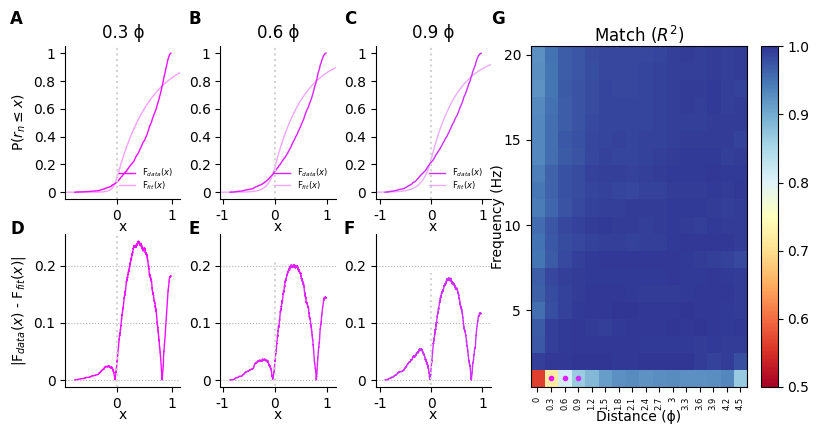

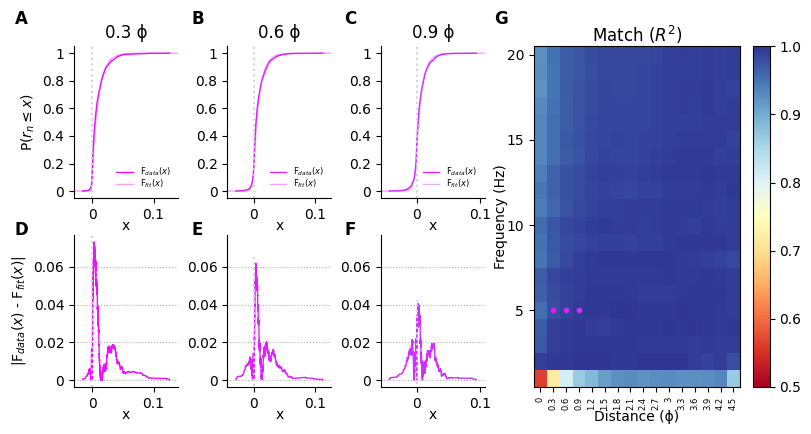

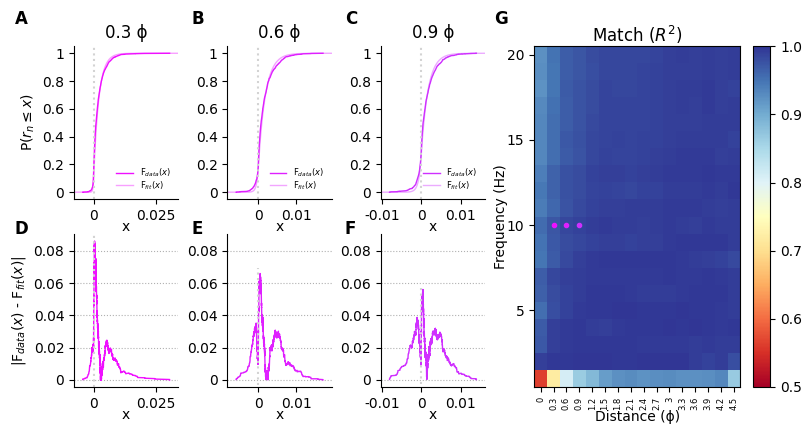

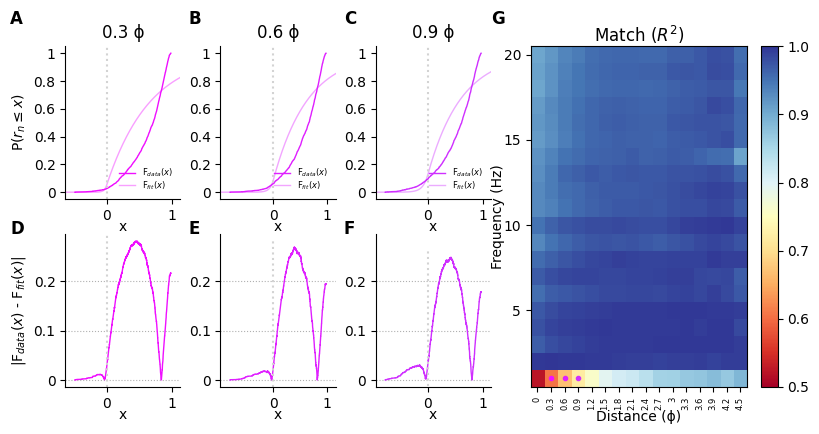

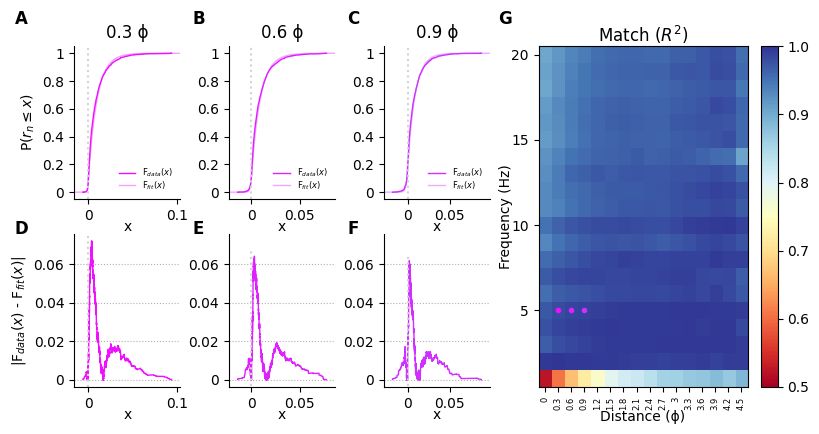

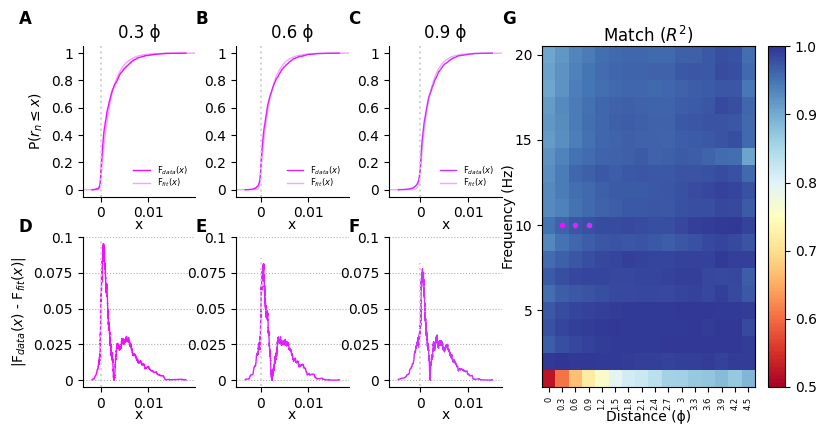

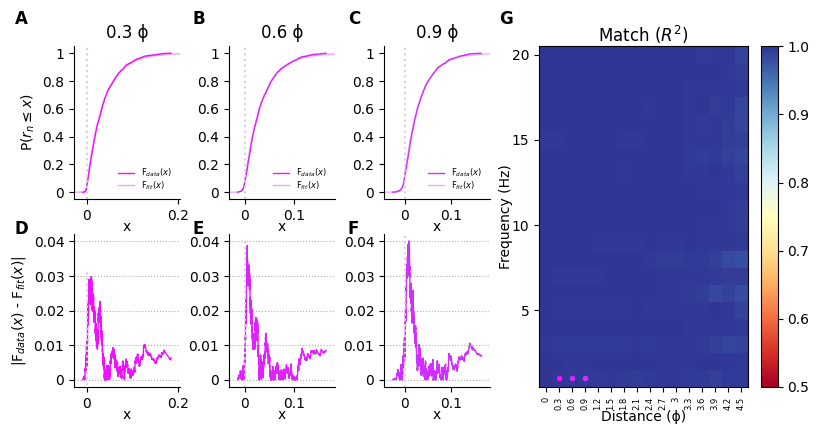

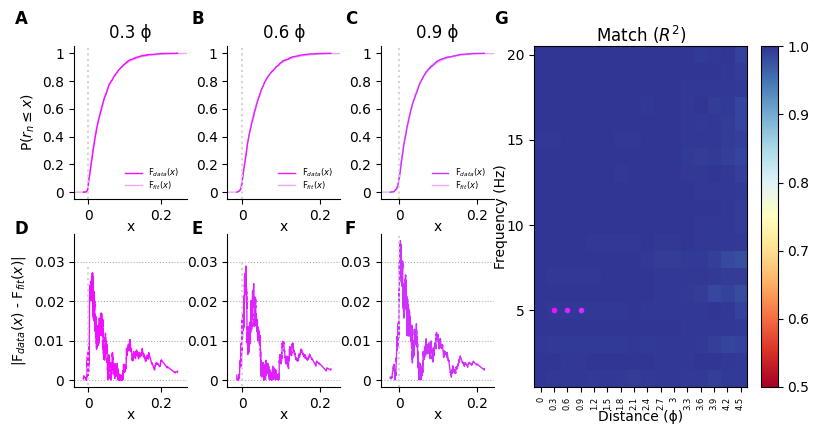

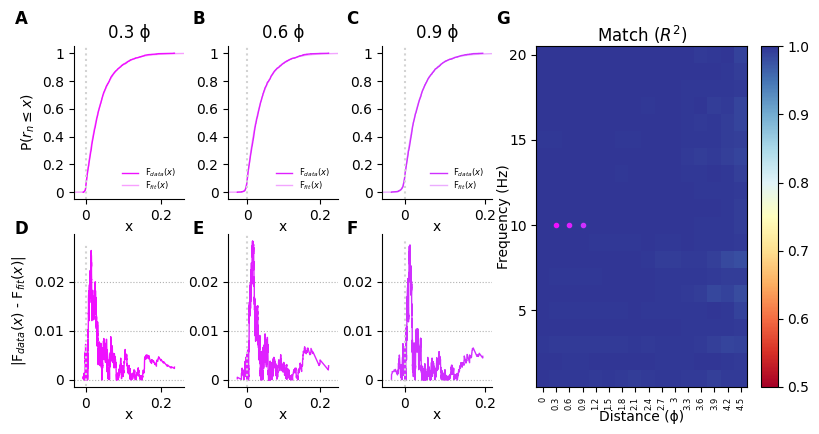

In [56]:
reload(fpft)
reload(fpf)
which_wnd_sec = wnd_sec_vals[0]
idist     = dict_update_from_field({"bw":[1,2,3],          "cr":[1,13,19]},         su_ds, "bw")
freq_max  = dict_update_from_field({"bw":21 * UNITS.hertz, "cr":101 * UNITS.hertz}, su_ds, "bw")
vmin      = dict_update_from_field({"bw":[0,0.5],          "cr":[0,0.5]},           su_ds, "bw")
vmax      = dict_update_from_field({"bw":[50,1],           "cr":[10,1]},            su_ds, "bw")
plot_pvals= False
for name, F in sorted(data.items()):
    if name == "bw": continue
    d = np.array(list(F.rho[iprb].keys()))
    d = np.sort(d[d>=0])
    for f in [1, 5, 10] * UNITS.hertz:
        which_freq = defaultdict(lambda: f)
        ax_cdf, ax_dcdf, ax_hm = fpf.plot_alaplace_fits(F, d[idist[name]],
                                                        which_probe = iprb,
                               ifreq_lim = [1, F.freqs2inds([freq_max[name]])[0]],
                               which_ifreq = F.freqs2inds([which_freq[name]])[0],
                                                        figsize=(8,4),
                                                        vmax=vmax[name],
                                                        vmin=vmin[name],
                                                        plot_dvals=True,
                                                        plot_pvals=plot_pvals)
        tight_layout(pad=0)
        fpft.label_axes(ax_cdf + ax_dcdf + ax_hm, "ABCDEFGHIJK",
                        align_y = [[0,1,2,6],[3,4,5,7]] if plot_pvals else [[0,1,2],[3,4,5]],
                        align_x = [[0,3],[1,4],[2,5]],
                        fontsize=12, fontweight="bold", dy=0)
        file_name = f"{fig_dir}/alap_fits_{name}_{which_freq[name].to(UNITS.hertz).magnitude}Hz.pdf"
        SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));

# Plot the figure showing λ(s)

      fisher_plumes_figs 2023/05/17 05:44:02     INFO: plot_gen_exp_paramter_fits_panel with which_fis=[1, 3, 7, 10], log_scale=True.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:710: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  xa = np.array(X, copy=True)


      fisher_plumes_figs 2023/05/17 05:44:03     INFO: plot_gen_exp_paramter_fits_panel with which_fis=[1, 3, 7, 10], log_scale=True.


Wrote figs/wnd_1sec/la_vs_s_fits_bw.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:710: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  xa = np.array(X, copy=True)


      fisher_plumes_figs 2023/05/17 05:44:04     INFO: plot_gen_exp_paramter_fits_panel with which_fis=[1, 3, 7, 10], log_scale=True.


Wrote figs/wnd_1sec/la_vs_s_fits_cr.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:710: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  xa = np.array(X, copy=True)


      fisher_plumes_figs 2023/05/17 05:44:06     INFO: plot_gen_exp_paramter_fits_panel with which_fis=[1, 3, 17, 20], log_scale=True.


Wrote figs/wnd_1sec/la_vs_s_fits_su.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:710: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  xa = np.array(X, copy=True)


      fisher_plumes_figs 2023/05/17 05:44:07     INFO: plot_gen_exp_paramter_fits_panel with which_fis=[1, 3, 17, 20], log_scale=True.


Wrote figs/wnd_1sec/la_vs_s_fits_su_high_pink.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:710: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  xa = np.array(X, copy=True)


Wrote figs/wnd_1sec/la_vs_s_fits_su_high_white.pdf.


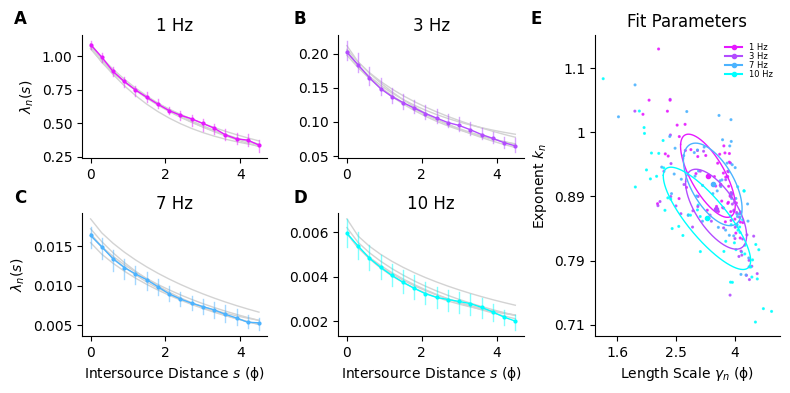

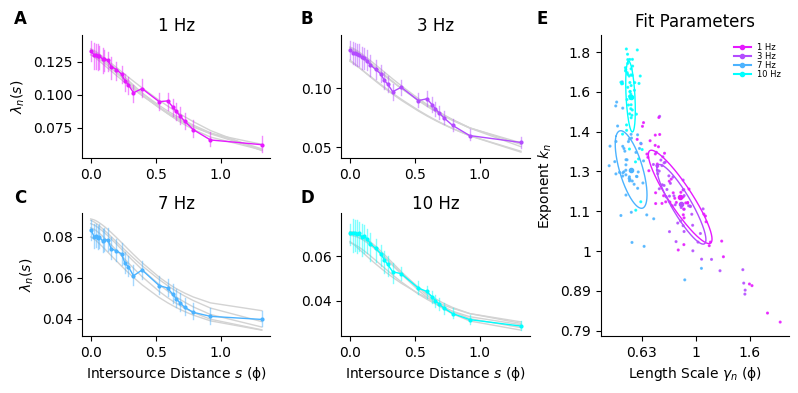

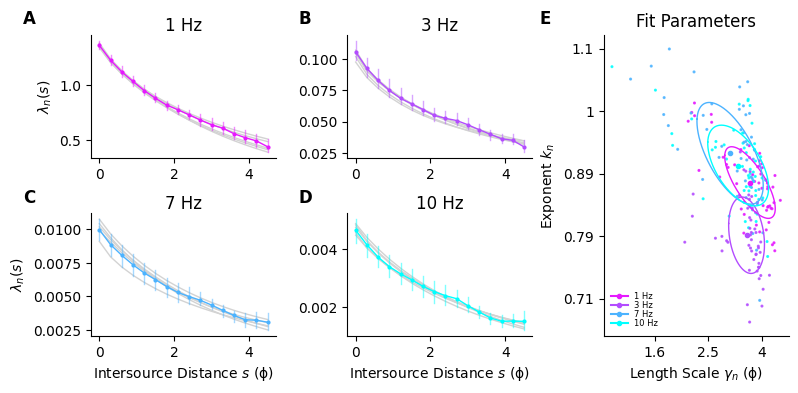

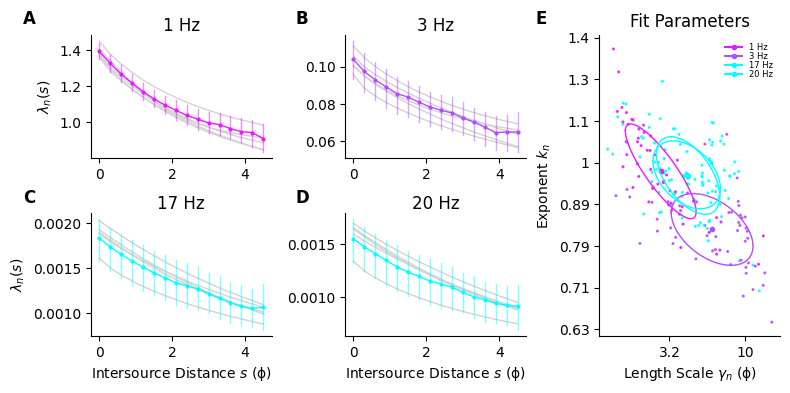

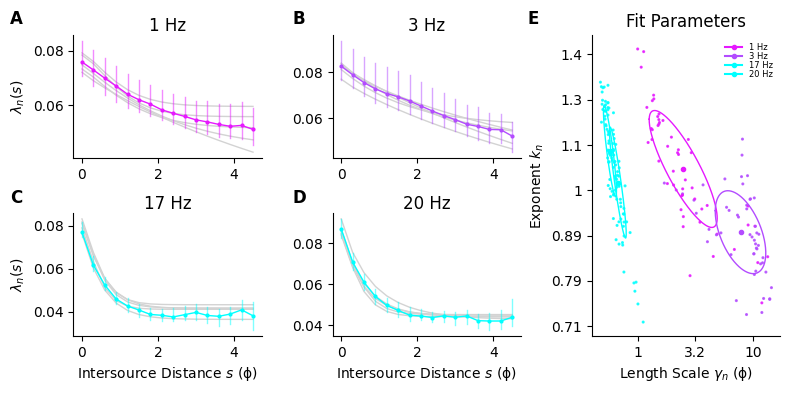

In [57]:
reload(fpft)
reload(fpf)
freqs  = dict_update({fld:[1,3,7,10] * UNITS.hertz for fld in ["bw", "cr", "su"]}, ["su_high_white", "su_high_pink"], [[1,3,17,20] * UNITS.hertz]*2)
xl     = dict_update_from_field({"bw":(-10,200),                 "cr": (-2, 50)},         su_ds, "bw")
xt     = dict_update_from_field({"bw":arange(0,201,50),          "cr": arange(0,101,25)},            su_ds, "bw")
xtp    = dict_update_from_field({"bw":np.array([60,90,135]),     "cr": np.array([40,60, 90, 135])},  su_ds, "bw")
ytp    = dict_update_from_field({"bw":np.array([0.8,1,1.2,1.5]), "cr": np.array([0.8,1,1.2,1.5,2])}, su_ds, "bw")
for k, F in sorted(data.items()):
    ax = fpf.plot_la_gen_fits_vs_distance(F, 
                                          figsize=(8,4), legloc = 'right',
                                          log_scale = True,
                                          scatter_size=1.5,
                                          which_ifreqs = F.freqs2inds(freqs[k]))
    [((i>1) and axi.set_xlabel(f"Intersource Distance $s$ ({fpf.pitch_sym})")) for i, axi in enumerate(ax[:4])]
    tight_layout(h_pad=1,w_pad=0.5)
    fpft.label_axes(ax, "ABCDEFGHIJK",
                    align_y = [[0,1,4],[2,3]],
                    align_x = [[0,2],[1,3]],
                    fontsize=12, fontweight="bold", dy=-0.02)                        
    file_name = f"{fig_dir}/la_vs_s_fits_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));

# Plot the Fisher Information

      fisher_plumes_figs 2023/05/17 05:51:07     INFO: dd[0]=100, dd[-1]=125000 (0.004, 5 ϕ)


      fisher_plumes_figs 2023/05/17 05:51:07     INFO: Plotting which_ifreqs=[1, 2, 5, 10, 20].


      fisher_plumes_figs 2023/05/17 05:51:08     INFO: dd[0]=100, dd[-1]=125000 (0.00131579, 1.64474 ϕ)


Wrote figs/wnd_1sec/fisher_info_bw.pdf.


      fisher_plumes_figs 2023/05/17 05:51:09     INFO: Plotting which_ifreqs=[5, 10, 20, 50, 100].


      fisher_plumes_figs 2023/05/17 05:51:11     INFO: dd[0]=100, dd[-1]=125000 (0.004, 5 ϕ)


      fisher_plumes_figs 2023/05/17 05:51:11     INFO: Plotting which_ifreqs=[1, 2, 5, 10, 20].


Wrote figs/wnd_1sec/fisher_info_cr.pdf.


      fisher_plumes_figs 2023/05/17 05:51:12     INFO: dd[0]=100, dd[-1]=125000 (0.004, 5 ϕ)


      fisher_plumes_figs 2023/05/17 05:51:12     INFO: Plotting which_ifreqs=[1, 2, 5, 10, 20].


Wrote figs/wnd_1sec/fisher_info_su.pdf.


      fisher_plumes_figs 2023/05/17 05:51:13     INFO: dd[0]=100, dd[-1]=125000 (0.004, 5 ϕ)


      fisher_plumes_figs 2023/05/17 05:51:13     INFO: Plotting which_ifreqs=[1, 2, 5, 10, 20].


Wrote figs/wnd_1sec/fisher_info_su_high_pink.pdf.


Wrote figs/wnd_1sec/fisher_info_su_high_white.pdf.


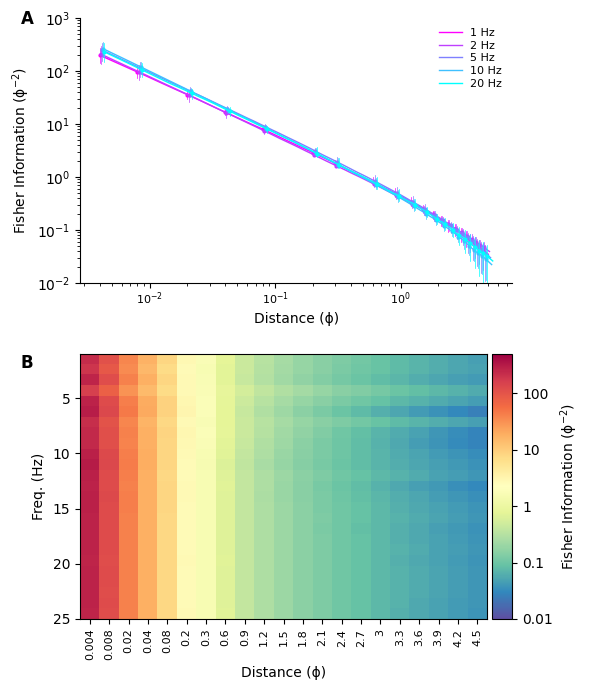

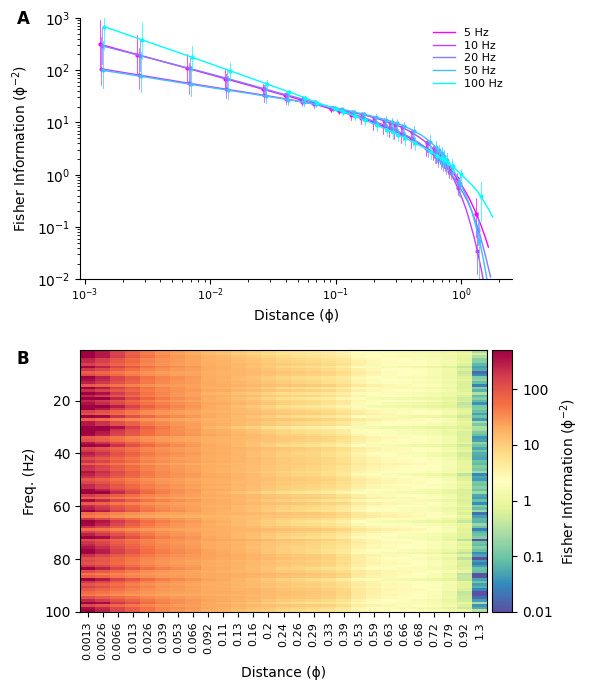

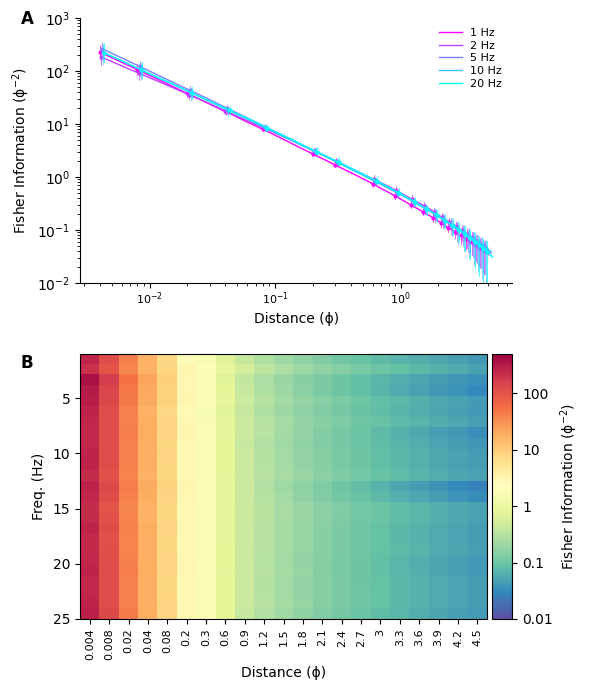

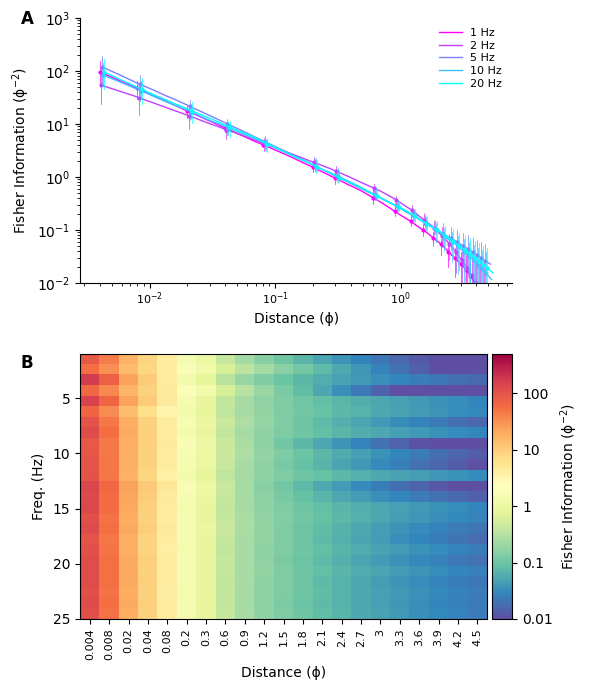

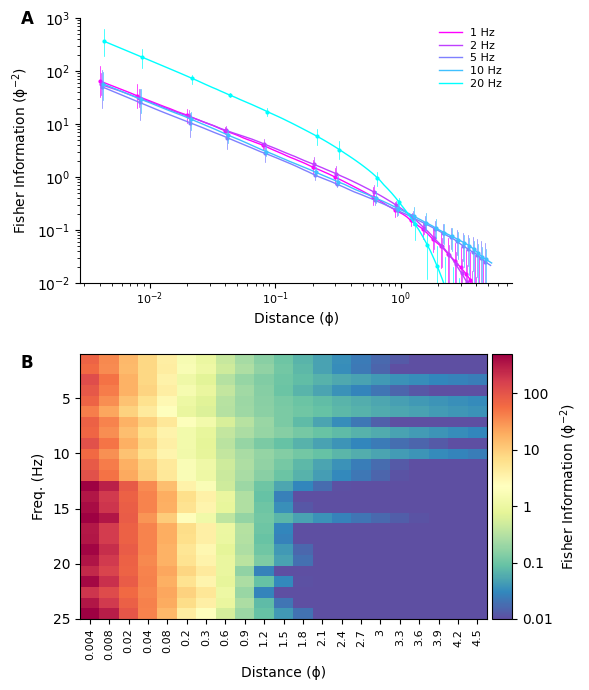

In [58]:
reload(fpt)
reload(fpft)
reload(fpf)
freqs     = dict_update_from_field({"cr":[5,10,20,50,100] * UNITS.hertz, "bw":[1,2, 5, 10, 20] * UNITS.hertz}, su_ds, "bw")
freq_max  = dict_update_from_field({"bw":25 * UNITS.hertz, "cr":100 * UNITS.hertz}, su_ds, "bw")
colscale  = dict_update_from_field({"bw":10,               "cr":40},                su_ds, "bw")
d_vals_um = dict_update_from_field({"bw":[1,5,50],         "cr":[0.1,10,70]},       su_ds, "bw")
d_lim_um  = dict_update_from_field({"bw":[100, 125000 ],   "cr":[100, 125000]},     su_ds, "bw")
bf_ytick  = dict_update_from_field({"bw":[0,5,10],         "cr":[0,50,100]},        su_ds, "bw")
bf_yl     = dict_update_from_field({"bw":[0,15],           "cr":[-5,100]},          su_ds, "bw")
plot_param_fits = False
for k, F in sorted(data.items()):
    figure(figsize=(6,7))
    ax_fisher, ax_best_freq, ax_d = fpf.plot_fisher_information(F,
                                                                which_probe = iprb,
                                                                d_lim_um   = d_lim_um[k],
                                                                d_vals_um  = np.array(d_vals_um[k])*1000,
                                                                d_space_fun  = lambda d0,d1,n:np.logspace(log10(d0),log10(d1),n),
                                                                which_ifreqs = F.freqs2inds(freqs[k]),
                                                                x_stagger = lambda x, i: x*(1.02**i),
                                                                fi_scale  = 1, plot_fun = plt.loglog,
                                                                log_scale = True,
                                                                plot_param_fits = plot_param_fits,
                                                                freq_max  = freq_max[k],
                                                                colfun    = lambda f: cm.cool_r(f/colscale[k]),
                                                                info_heatmap = True,
                                                                heatmap_range =[-2, log10(500)],
                                                                heatmap_cm    =cm.Spectral_r,
                                                                #bf_ytick  = bf_ytick[k],
    )
    ax_fisher.set_ylim(1e-2,1e3)
    tight_layout(h_pad=2,w_pad=0)
    fpft.label_axes([ax_fisher, ax_best_freq] + ax_d , "ABCDEFGHIJK",
                    #align_y = [[2,3,4]],
                    align_x = [[0,1,2] if plot_param_fits else [0,1]],
                    fontsize=12, fontweight="bold", dy=-0.02)
    #ax_best_freq.set_ylim(bf_yl[k])
    file_name = f"{fig_dir}/fisher_info_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));
    

# Plot best frequency for each probe

/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/best_freq_bw.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/best_freq_cr.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/best_freq_su.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/best_freq_su_high_pink.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/best_freq_su_high_white.pdf.


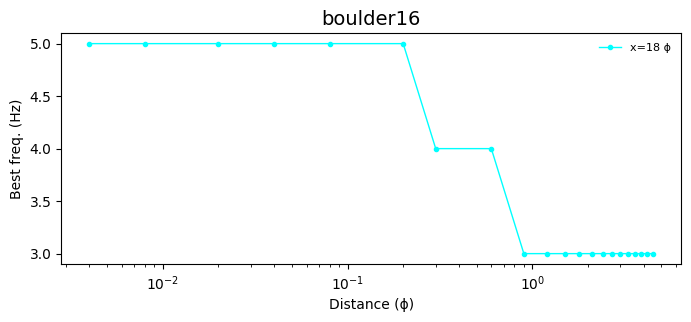

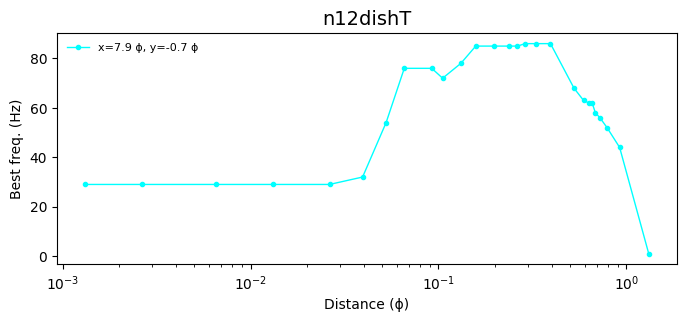

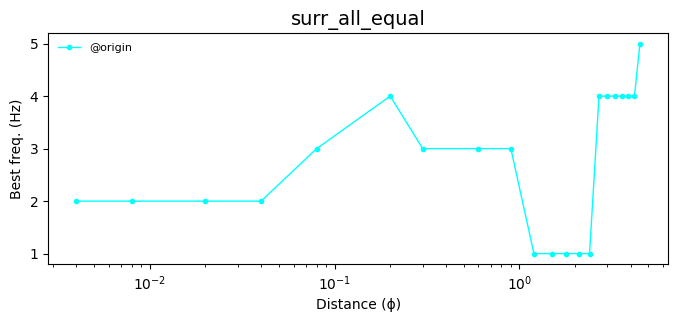

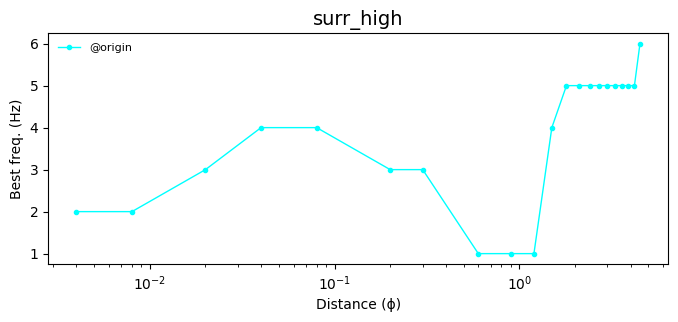

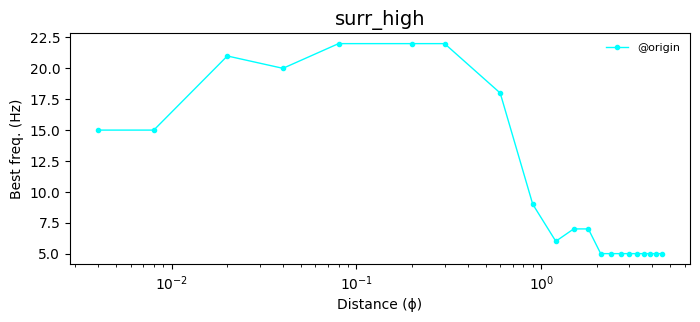

In [59]:
for k, F in sorted(data.items()):
    probe_coords = utils.d1(F.sims).get_used_probe_coords()
    probe_xcoords_sorted = sorted([p[0] for p in probe_coords])
    probe_names = utils.d1(F.sims).coord_strs
    n_probes = len(probe_coords)
    figure(figsize=(8,3))
    dd = F.I_dists/F.pitch.to(UNITS.um).magnitude
    for which_probe, (px,py) in enumerate(probe_coords):
        semilogx(dd, median(F.freqs[F.I_best_ifreqs[which_probe]][1:],axis=0),
                 "o-",markersize=3, linewidth=1, color = cm.cool(probe_xcoords_sorted.index(px)/max((n_probes-1),1)), label=probe_names[which_probe])
    xlabel("Distance (ϕ)")
    ylabel("Best freq. (Hz)")
    title(F.name, fontsize=14)
    legend(frameon=False, labelspacing=0, fontsize=8)
    file_name = f"{fig_dir}/best_freq_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));
        


# Plot the Power in each Signal

Wrote figs/wnd_1sec/spectra.pdf.


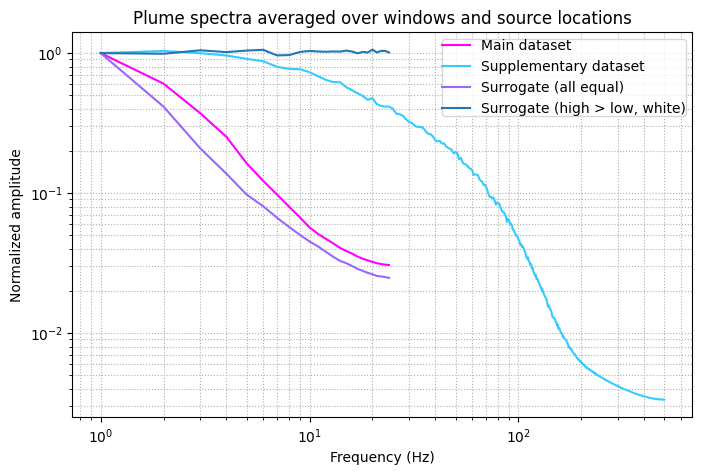

In [66]:
figure(figsize=(8,5))
for k, F in sorted(data.items()):
    if k == "su_high_pink": continue # Has the same spectrum as su.
    f = []
    for _, s in F.sims.items():
        fs = F.fs.to(UNITS.hertz).magnitude
        fr, ti, S = stft(s.data[:,iprb], fs = fs, window='boxcar',
                         nperseg=int(fs), noverlap=fs//2, boundary=None, padded=False)
        f.append(np.abs(S))
        
    f = np.array(f)
    a = np.mean(f,axis=-1).mean(axis=0)    
    loglog(fr[fr<fs/2][1:],a[fr<fs/2][1:]/a[1],
           label={"cr":"Supplementary dataset", "bw":"Main dataset", "su":"Surrogate (all equal)", "su_high_white":"Surrogate (high > low, white)", "su_high_pink":"Surrogate (high > low, pink)" }[k],
           color={"su_high_pink":"pink", "su_high_white":"C0", "su":cm.cool_r(0.4), "bw":cm.cool_r(0.0), "cr":cm.cool_r(0.8)}[k])
legend(borderpad=0)
xlabel("Frequency (Hz)")
ylabel("Normalized amplitude")
title("Plume spectra averaged over windows and source locations")
grid(True, which='both', linestyle=":")
file_name = f"{fig_dir}/spectra.pdf"
SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));

# The End